In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from six import StringIO
import pydotplus
import seaborn as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

#pre-processing


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("dataset.csv")
df.head(20)

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01/01/2000,2.0,24.0,33.8,27.7,80.0,7.1,8.0,180.0,3.0,N
1,01/02/2000,0.0,25.0,32.8,27.3,81.0,3.3,8.0,290.0,5.0,W
2,01/03/2000,16.0,23.0,30.4,26.0,86.0,1.2,5.0,250.0,3.0,W
3,01/04/2000,0.3,25.0,31.8,28.4,78.0,6.1,4.0,100.0,3.0,E
4,01/05/2000,5.0,24.0,32.4,28.6,80.0,6.7,4.0,60.0,2.0,S
5,01/06/2000,0.0,25.0,32.6,28.2,81.0,6.4,6.0,90.0,4.0,W
6,01/07/2000,8.0,24.0,33.3,28.1,80.0,5.0,9.0,270.0,3.0,W
7,01/08/2000,82.3,22.0,29.0,25.2,89.0,0.0,4.0,330.0,2.0,NW
8,01/09/2000,11.0,23.0,32.7,26.1,88.0,6.2,8.0,300.0,3.0,NW
9,01/10/2000,83.6,23.0,32.0,26.8,86.0,6.4,13.0,70.0,3.0,W


In [ ]:
# Convert 'Tanggal' column to datetime format
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  7671 non-null   datetime64[ns]
 1   RR       7336 non-null   float64       
 2   Tn       7233 non-null   float64       
 3   Tx       7290 non-null   float64       
 4   Tavg     7434 non-null   float64       
 5   RH_avg   7433 non-null   float64       
 6   ss       7215 non-null   float64       
 7   ff_x     7466 non-null   float64       
 8   ddd_x    7466 non-null   float64       
 9   ff_avg   7465 non-null   float64       
 10  ddd_car  7444 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 659.4+ KB


In [ ]:
# Create a new column 'Season' based on month and day ranges
df['Season'] = 'Rendheng'  # Default value

# Set 'Mareng' for dates between March 26 and June 21
df.loc[(df['Tanggal'].dt.month == 3) & (df['Tanggal'].dt.day >= 26) |
       (df['Tanggal'].dt.month == 4) |
       (df['Tanggal'].dt.month == 5) |
       (df['Tanggal'].dt.month == 6) & (df['Tanggal'].dt.day <= 21), 'Season'] = 'Mareng'

# Set 'Ketiga' for dates between June 22 and September 17
df.loc[(df['Tanggal'].dt.month == 6) & (df['Tanggal'].dt.day >= 22) |
       (df['Tanggal'].dt.month == 7) |
       (df['Tanggal'].dt.month == 8) |
       (df['Tanggal'].dt.month == 9) & (df['Tanggal'].dt.day <= 17), 'Season'] = 'Ketiga'

# Set 'Labuh' for dates between September 18 and December 21
df.loc[(df['Tanggal'].dt.month == 9) & (df['Tanggal'].dt.day >= 18) |
       (df['Tanggal'].dt.month == 10) |
       (df['Tanggal'].dt.month == 11) |
       (df['Tanggal'].dt.month == 12) & (df['Tanggal'].dt.day <= 21), 'Season'] = 'Labuh'


In [ ]:
# Create a new column 'Mangsa' based on the specified date ranges
df['Mangsa'] = 7  # Default value

# Set 'Kasa' for dates between June 22 and August 1
df.loc[(df['Tanggal'].dt.month == 6) & (df['Tanggal'].dt.day >= 22) |
       (df['Tanggal'].dt.month == 7) |
       (df['Tanggal'].dt.month == 8) & (df['Tanggal'].dt.day <= 1), 'Mangsa'] = 1

# Set 'Karo' for dates between August 2 and August 24
df.loc[(df['Tanggal'].dt.month == 8) & (df['Tanggal'].dt.day >= 2) & (df['Tanggal'].dt.day <= 24), 'Mangsa'] = 2

# Set 'Katelu' for dates between August 25 and September 17
df.loc[(df['Tanggal'].dt.month == 8) & (df['Tanggal'].dt.day >= 25) |
       (df['Tanggal'].dt.month == 9) & (df['Tanggal'].dt.day <= 17), 'Mangsa'] = 3

# Set 'Kapat' for dates between September 18 and October 12
df.loc[(df['Tanggal'].dt.month == 9) & (df['Tanggal'].dt.day >= 18) |
       (df['Tanggal'].dt.month == 10) & (df['Tanggal'].dt.day <= 12), 'Mangsa'] = 4

# Set 'Kalimo' for dates between October 13 and November 8
df.loc[(df['Tanggal'].dt.month == 10) & (df['Tanggal'].dt.day >= 13) |
       (df['Tanggal'].dt.month == 11) & (df['Tanggal'].dt.day <= 8), 'Mangsa'] = 5

# Set 'Kanem' for dates between November 9 and December 21
df.loc[(df['Tanggal'].dt.month == 11) & (df['Tanggal'].dt.day >= 9) |
       (df['Tanggal'].dt.month == 12) & (df['Tanggal'].dt.day <= 21), 'Mangsa'] = 6

# Set 'Kawolu' for dates between February 3-29
df.loc[(df['Tanggal'].dt.month == 2) & (df['Tanggal'].dt.day >= 3) & (df['Tanggal'].dt.day <= 29), 'Mangsa'] = 8

# Set 'Kasanga' for dates between March 1-25
df.loc[(df['Tanggal'].dt.month == 3) & (df['Tanggal'].dt.day >= 1) |
       (df['Tanggal'].dt.month == 3) & (df['Tanggal'].dt.day <= 25), 'Mangsa'] = 9

# Set 'Kasadasa' for dates between March 26 until April 18
df.loc[(df['Tanggal'].dt.month == 3) & (df['Tanggal'].dt.day >= 26) |
       (df['Tanggal'].dt.month == 4) & (df['Tanggal'].dt.day <= 18), 'Mangsa'] = 10

# Set 'Dhesta' for dates between April 19 until May 11
df.loc[(df['Tanggal'].dt.month == 4) & (df['Tanggal'].dt.day >= 19) |
       (df['Tanggal'].dt.month == 5) & (df['Tanggal'].dt.day <= 11), 'Mangsa'] = 11

# Set 'Sadha' for dates between May 12 until June 21
df.loc[(df['Tanggal'].dt.month == 5) & (df['Tanggal'].dt.day >= 12) |
       (df['Tanggal'].dt.month == 6) & (df['Tanggal'].dt.day <= 21), 'Mangsa'] = 12


In [ ]:
descriptive_stats = df.describe()

df.describe()

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,Mangsa
count,7671,7336.000000,7233.000000,7290.000000,7434.000000,7433.000000,7215.000000,7466.000000,7466.000000,7465.000000,7671.000000
mean,2010-07-02 00:00:00,495.374237,24.137785,32.300316,27.806726,76.642944,6.174262,6.390169,138.139030,3.375620,6.497067
min,2000-01-01 00:00:00,0.000000,17.000000,24.000000,23.600000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2005-04-01 12:00:00,0.000000,23.000000,31.400000,27.000000,72.000000,4.400000,5.000000,90.000000,3.000000,4.000000
50%,2010-07-02 00:00:00,0.000000,24.000000,32.200000,27.800000,77.000000,7.100000,6.000000,100.000000,3.000000,6.000000
75%,2015-10-01 12:00:00,6.400000,25.000000,33.100000,28.600000,82.000000,8.000000,7.000000,160.000000,4.000000,9.000000
max,2020-12-31 00:00:00,8888.000000,29.000000,36.700000,33.200000,96.000000,11.000000,21.000000,360.000000,24.000000,12.000000
std,NaN,2026.284724,1.450666,1.250246,1.208266,7.282830,2.636534,1.878366,90.124409,1.158798,3.492060


In [ ]:
descriptive_stats.loc['missing'] = df.isnull().sum()
df.isnull().sum()

Tanggal      0
RR         335
Tn         438
Tx         381
Tavg       237
RH_avg     238
ss         456
ff_x       205
ddd_x      205
ff_avg     206
ddd_car    227
Season       0
Mangsa       0
dtype: int64

In [ ]:
# Define the filtering function
def filter_numeric(val):
    if val > 1000:
        val = np.NaN
    return val

# Apply the filtering function to all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].applymap(filter_numeric)

In [ ]:
# Assuming 'ColumnName' is the name of the column where you want to replace 'c' with np.nan
df['ddd_car'] = df['ddd_car'].replace('C ', np.nan)

In [ ]:
# # Assuming 'Season' is the column based on which you want to calculate modes
# # and 'ddd_car' is the column with missing values

# # Calculate the mode for each 'Season' group
# mode_per_season = df.groupby('Season')['ddd_car'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# # Fill missing values in 'ddd_car' with the corresponding mode for each 'Season'
# df['ddd_car'] = df.apply(lambda row: mode_per_season[row['Season']] if pd.isnull(row['ddd_car']) else row['ddd_car'], axis=1)

# # Display the most frequent values for each 'Season'
# print('Mode per Season:')
# print(mode_per_season)

In [ ]:
# Assuming 'Mangsa' is the column based on which you want to calculate modes
# and 'ddd_car' is the column with missing values

# Calculate the mode for each 'Mangsa' group
mode_per_mangsa = df.groupby('Mangsa')['ddd_car'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing values in 'ddd_car' with the corresponding mode for each 'Mangsa'
df['ddd_car'] = df.apply(lambda row: mode_per_mangsa[row['Mangsa']] if pd.isnull(row['ddd_car']) else row['ddd_car'], axis=1)

# Display the most frequent values for each 'Mangsa'
print('Mode per Mangsa:')
print(mode_per_mangsa)

Mode per Mangsa:
Mangsa
1     E 
2     E 
3     E 
4     E 
5     E 
6     E 
7     W 
8     W 
9     W 
10    E 
11    E 
12    E 
Name: ddd_car, dtype: object


In [ ]:
# Function to convert wind direction string to degrees
def convert_ddd_car_to_degrees(direction):
    direction_mapping = {
        "N ": 0,
        "NE": 45,
        "E ": 90,
        "SE": 135,
        "S ": 180,
        "SW": 225,
        "W ": 270,
        "NW": 315
    }

    # Convert the direction to degrees, defaulting to 0 if not found in the mapping
    degrees = direction_mapping.get(direction, 0)
    return degrees

# Apply the conversion function to the 'ddd_car' column
df['wind_degrees'] = df['ddd_car'].apply(convert_ddd_car_to_degrees)
df

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,ddd_car,Season,Mangsa,wind_degrees
0,2000-01-01,2.0,24.0,33.8,27.7,80.0,7.1,8.0,180.0,3.0,N,Rendheng,7,0
1,2000-01-02,0.0,25.0,32.8,27.3,81.0,3.3,8.0,290.0,5.0,W,Rendheng,7,270
2,2000-01-03,16.0,23.0,30.4,26.0,86.0,1.2,5.0,250.0,3.0,W,Rendheng,7,270
3,2000-01-04,0.3,25.0,31.8,28.4,78.0,6.1,4.0,100.0,3.0,E,Rendheng,7,90
4,2000-01-05,5.0,24.0,32.4,28.6,80.0,6.7,4.0,60.0,2.0,S,Rendheng,7,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,2020-12-27,19.5,25.0,31.4,28.7,82.0,5.2,10.0,320.0,2.0,W,Rendheng,7,270
7667,2020-12-28,109.0,23.3,31.6,27.2,89.0,2.7,5.0,170.0,2.0,W,Rendheng,7,270
7668,2020-12-29,35.8,23.5,31.8,27.6,88.0,4.3,8.0,130.0,3.0,W,Rendheng,7,270
7669,2020-12-30,8.9,24.4,30.0,25.0,96.0,3.0,7.0,80.0,2.0,W,Rendheng,7,270


In [ ]:
# from sklearn.impute import SimpleImputer

# # Get the list of numeric columns in the DataFrame
# numeric_columns = df.select_dtypes(include='number').columns

# # Iterate over unique classes in 'Season' column
# for class_label in df['Season'].unique():
#     # Select rows corresponding to the current class
#     class_rows = (df['Season'] == class_label)

#     # Create a SimpleImputer for the current class using median strategy
#     imputer = SimpleImputer(strategy='median')

#     # Fit and transform the imputer on the numeric features of the current class
#     df.loc[class_rows, numeric_columns] = imputer.fit_transform(
#         df.loc[class_rows, numeric_columns]
#     )
# df. isna(). sum()

In [ ]:
# from sklearn.impute import SimpleImputer

# # Get the list of numeric columns in the DataFrame
# numeric_columns = df.select_dtypes(include='number').columns

# # Iterate over unique classes in 'Season' column
# for class_label in df['Season'].unique():
#     # Select rows corresponding to the current class
#     class_rows = (df['Season'] == class_label)

#     # Create a SimpleImputer for the current class using mean strategy
#     imputer = SimpleImputer(strategy='mean')

#     # Fit and transform the imputer on the numeric features of the current class
#     df.loc[class_rows, numeric_columns] = imputer.fit_transform(
#         df.loc[class_rows, numeric_columns]
#     )

# # Check for missing values after imputation
# df.isna().sum()


In [ ]:
from sklearn.impute import SimpleImputer

# Get the list of numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Iterate over unique classes in 'Mangsa' column
for class_label in df['Mangsa'].unique():
    # Select rows corresponding to the current class
    class_rows = (df['Mangsa'] == class_label)

    # Create a SimpleImputer for the current class using mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit and transform the imputer on the numeric features of the current class
    df.loc[class_rows, numeric_columns] = imputer.fit_transform(
        df.loc[class_rows, numeric_columns]
    )

# Check for missing values after imputation
df.isna().sum()


Tanggal         0
RR              0
Tn              0
Tx              0
Tavg            0
RH_avg          0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
Season          0
Mangsa          0
wind_degrees    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Tanggal,7671,2010-07-02 00:00:00,2000-01-01 00:00:00,2005-04-01 12:00:00,2010-07-02 00:00:00,2015-10-01 12:00:00,2020-12-31 00:00:00,NaN
RR,7671.0,6.458557,0.0,0.0,0.0,6.5,159.3,14.575795
Tn,7671.0,24.151199,17.0,23.0,24.0,25.0,29.0,1.418056
Tx,7671.0,32.295671,24.0,31.5,32.2,33.0,36.7,1.224885
Tavg,7671.0,27.806536,23.6,27.0,27.8,28.6,33.2,1.19143
RH_avg,7671.0,76.728908,44.0,72.0,77.0,82.0,96.0,7.210732
ss,7671.0,6.147611,0.0,4.465269,6.9,8.0,11.0,2.579944
ff_x,7671.0,6.388889,0.0,5.0,6.0,7.0,21.0,1.855041
ddd_x,7671.0,138.909064,0.0,90.0,100.0,170.0,360.0,89.481952
ff_avg,7671.0,3.374531,0.0,3.0,3.0,4.0,24.0,1.144051


In [ ]:
df['Dasarian'] = 1
df.loc[(df['Tanggal'].dt.day > 10) & (df['Tanggal'].dt.day <= 20), 'Dasarian'] = 2
df.loc[(df['Tanggal'].dt.day > 20), 'Dasarian'] = 3
df.tail(20)

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,ddd_car,Season,Mangsa,wind_degrees,Dasarian
7651,2020-12-12,12.800000,25.0,30.2,26.3,89.0,1.3,4.0,300.0,2.0,W,Labuh,6,270,2
7652,2020-12-13,73.100000,23.6,32.1,27.0,83.0,0.0,11.0,320.0,4.0,W,Labuh,6,270,2
7653,2020-12-14,3.600000,24.1,31.0,26.7,85.0,2.8,5.0,270.0,2.0,E,Labuh,6,90,2
7654,2020-12-15,1.200000,24.7,30.8,26.8,88.0,4.0,8.0,210.0,2.0,E,Labuh,6,90,2
7655,2020-12-16,48.000000,23.3,30.7,26.1,92.0,0.0,6.0,80.0,1.0,E,Labuh,6,90,2
7656,2020-12-17,29.200000,24.5,31.6,27.0,89.0,4.3,6.0,300.0,3.0,W,Labuh,6,270,2
7657,2020-12-18,18.400000,24.0,30.9,26.7,86.0,2.5,4.0,130.0,2.0,W,Labuh,6,270,2
7658,2020-12-19,45.400000,23.8,31.0,26.8,84.0,4.1,9.0,80.0,2.0,E,Labuh,6,90,2
7659,2020-12-20,19.000000,23.9,32.8,28.1,76.0,3.5,6.0,260.0,3.0,W,Labuh,6,270,2
7660,2020-12-21,0.000000,25.0,32.8,28.5,72.0,6.3,7.0,150.0,3.0,W,Labuh,6,270,3


In [ ]:
# Extract month-year information
df['Month_Year'] = df['Tanggal'].dt.to_period('M')

# Group by 'Dasarian' and 'Month_Year', then calculate the sum for the 'RR' column
dasarian_monthly_sum = df.groupby(['Dasarian', 'Month_Year'])['RR'].sum().reset_index()

# Merge the calculated sum back to the original DataFrame
df = pd.merge(df, dasarian_monthly_sum, on=['Dasarian', 'Month_Year'], how='left', suffixes=('', '_sum'))

df

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,ddd_car,Season,Mangsa,wind_degrees,Dasarian,Month_Year,RR_sum
0,2000-01-01,2.0,24.0,33.8,27.7,80.0,7.1,8.0,180.0,3.0,N,Rendheng,7,0,1,2000-01,208.200000
1,2000-01-02,0.0,25.0,32.8,27.3,81.0,3.3,8.0,290.0,5.0,W,Rendheng,7,270,1,2000-01,208.200000
2,2000-01-03,16.0,23.0,30.4,26.0,86.0,1.2,5.0,250.0,3.0,W,Rendheng,7,270,1,2000-01,208.200000
3,2000-01-04,0.3,25.0,31.8,28.4,78.0,6.1,4.0,100.0,3.0,E,Rendheng,7,90,1,2000-01,208.200000
4,2000-01-05,5.0,24.0,32.4,28.6,80.0,6.7,4.0,60.0,2.0,S,Rendheng,7,180,1,2000-01,208.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,2020-12-27,19.5,25.0,31.4,28.7,82.0,5.2,10.0,320.0,2.0,W,Rendheng,7,270,3,2020-12,222.539541
7667,2020-12-28,109.0,23.3,31.6,27.2,89.0,2.7,5.0,170.0,2.0,W,Rendheng,7,270,3,2020-12,222.539541
7668,2020-12-29,35.8,23.5,31.8,27.6,88.0,4.3,8.0,130.0,3.0,W,Rendheng,7,270,3,2020-12,222.539541
7669,2020-12-30,8.9,24.4,30.0,25.0,96.0,3.0,7.0,80.0,2.0,W,Rendheng,7,270,3,2020-12,222.539541


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       7671 non-null   datetime64[ns]
 1   RR            7671 non-null   float64       
 2   Tn            7671 non-null   float64       
 3   Tx            7671 non-null   float64       
 4   Tavg          7671 non-null   float64       
 5   RH_avg        7671 non-null   float64       
 6   ss            7671 non-null   float64       
 7   ff_x          7671 non-null   float64       
 8   ddd_x         7671 non-null   float64       
 9   ff_avg        7671 non-null   float64       
 10  ddd_car       7671 non-null   object        
 11  Season        7671 non-null   object        
 12  Mangsa        7671 non-null   int64         
 13  wind_degrees  7671 non-null   int64         
 14  Dasarian      7671 non-null   int64         
 15  Month_Year    7671 non-null   period[M

In [ ]:
df

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,ddd_car,Season,Mangsa,wind_degrees,Dasarian,Month_Year,RR_sum
0,2000-01-01,2.0,24.0,33.8,27.7,80.0,7.1,8.0,180.0,3.0,N,Rendheng,7,0,1,2000-01,208.200000
1,2000-01-02,0.0,25.0,32.8,27.3,81.0,3.3,8.0,290.0,5.0,W,Rendheng,7,270,1,2000-01,208.200000
2,2000-01-03,16.0,23.0,30.4,26.0,86.0,1.2,5.0,250.0,3.0,W,Rendheng,7,270,1,2000-01,208.200000
3,2000-01-04,0.3,25.0,31.8,28.4,78.0,6.1,4.0,100.0,3.0,E,Rendheng,7,90,1,2000-01,208.200000
4,2000-01-05,5.0,24.0,32.4,28.6,80.0,6.7,4.0,60.0,2.0,S,Rendheng,7,180,1,2000-01,208.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,2020-12-27,19.5,25.0,31.4,28.7,82.0,5.2,10.0,320.0,2.0,W,Rendheng,7,270,3,2020-12,222.539541
7667,2020-12-28,109.0,23.3,31.6,27.2,89.0,2.7,5.0,170.0,2.0,W,Rendheng,7,270,3,2020-12,222.539541
7668,2020-12-29,35.8,23.5,31.8,27.6,88.0,4.3,8.0,130.0,3.0,W,Rendheng,7,270,3,2020-12,222.539541
7669,2020-12-30,8.9,24.4,30.0,25.0,96.0,3.0,7.0,80.0,2.0,W,Rendheng,7,270,3,2020-12,222.539541


In [ ]:
# Calculate the average for each 'Dasarian' within each month
average_dasarian = df.groupby(['Month_Year', 'Dasarian'])[['Tavg', 'RH_avg', 'ff_avg', 'ss']].mean().reset_index()
# Merge the averages back into the original DataFrame
df = pd.merge(df, average_dasarian, on=['Month_Year', 'Dasarian'], how='left', suffixes=('', '_dasarian'))
df

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,...,Season,Mangsa,wind_degrees,Dasarian,Month_Year,RR_sum,Tavg_dasarian,RH_avg_dasarian,ff_avg_dasarian,ss_dasarian
0,2000-01-01,2.0,24.0,33.8,27.7,80.0,7.1,8.0,180.0,3.0,...,Rendheng,7,0,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000
1,2000-01-02,0.0,25.0,32.8,27.3,81.0,3.3,8.0,290.0,5.0,...,Rendheng,7,270,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000
2,2000-01-03,16.0,23.0,30.4,26.0,86.0,1.2,5.0,250.0,3.0,...,Rendheng,7,270,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000
3,2000-01-04,0.3,25.0,31.8,28.4,78.0,6.1,4.0,100.0,3.0,...,Rendheng,7,90,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000
4,2000-01-05,5.0,24.0,32.4,28.6,80.0,6.7,4.0,60.0,2.0,...,Rendheng,7,180,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,2020-12-27,19.5,25.0,31.4,28.7,82.0,5.2,10.0,320.0,2.0,...,Rendheng,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636
7667,2020-12-28,109.0,23.3,31.6,27.2,89.0,2.7,5.0,170.0,2.0,...,Rendheng,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636
7668,2020-12-29,35.8,23.5,31.8,27.6,88.0,4.3,8.0,130.0,3.0,...,Rendheng,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636
7669,2020-12-30,8.9,24.4,30.0,25.0,96.0,3.0,7.0,80.0,2.0,...,Rendheng,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636


In [ ]:
# Group by 'Month_Year' dan 'Dasarian', dan ambil nilai 'ddd_car' yang paling sering muncul
df_most_frequent_ddd_car = df.groupby(['Month_Year', 'Dasarian'])['ddd_car'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Merge DataFrame asli dengan DataFrame hasil grouping untuk menambahkan kolom baru
df = pd.merge(df, df_most_frequent_ddd_car, on=['Month_Year', 'Dasarian'], how='left', suffixes=('', '_most'))
df

,Tanggal,RR,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,...,Mangsa,wind_degrees,Dasarian,Month_Year,RR_sum,Tavg_dasarian,RH_avg_dasarian,ff_avg_dasarian,ss_dasarian,ddd_car_most
0,2000-01-01,2.0,24.0,33.8,27.7,80.0,7.1,8.0,180.0,3.0,...,7,0,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000,W
1,2000-01-02,0.0,25.0,32.8,27.3,81.0,3.3,8.0,290.0,5.0,...,7,270,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000,W
2,2000-01-03,16.0,23.0,30.4,26.0,86.0,1.2,5.0,250.0,3.0,...,7,270,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000,W
3,2000-01-04,0.3,25.0,31.8,28.4,78.0,6.1,4.0,100.0,3.0,...,7,90,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000,W
4,2000-01-05,5.0,24.0,32.4,28.6,80.0,6.7,4.0,60.0,2.0,...,7,180,1,2000-01,208.200000,27.240000,82.900000,3.100000,4.840000,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,2020-12-27,19.5,25.0,31.4,28.7,82.0,5.2,10.0,320.0,2.0,...,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636,W
7667,2020-12-28,109.0,23.3,31.6,27.2,89.0,2.7,5.0,170.0,2.0,...,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636,W
7668,2020-12-29,35.8,23.5,31.8,27.6,88.0,4.3,8.0,130.0,3.0,...,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636,W
7669,2020-12-30,8.9,24.4,30.0,25.0,96.0,3.0,7.0,80.0,2.0,...,7,270,3,2020-12,222.539541,27.854545,82.272727,2.454545,4.663636,W


In [ ]:
df_new = df[['Month_Year', 'Dasarian', 'Mangsa', 'RR_sum', 'Tavg_dasarian', 'RH_avg_dasarian', 'ss_dasarian', 'ff_avg_dasarian', 'ddd_car_most']]
df_new

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W
1,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W
2,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W
3,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W
4,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W
...,...,...,...,...,...,...,...,...,...
7666,2020-12,3,7,222.539541,27.854545,82.272727,4.663636,2.454545,W
7667,2020-12,3,7,222.539541,27.854545,82.272727,4.663636,2.454545,W
7668,2020-12,3,7,222.539541,27.854545,82.272727,4.663636,2.454545,W
7669,2020-12,3,7,222.539541,27.854545,82.272727,4.663636,2.454545,W


In [ ]:
# Hapus baris yang memiliki nilai 'Month_Year' dan 'Dasarian' yang sama
df_new = df_new.drop_duplicates(subset=['Month_Year', 'Dasarian'])
df_new

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W
10,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W
20,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W
31,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W
41,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,W
...,...,...,...,...,...,...,...,...,...
7620,2020-11,2,6,22.130535,29.980000,74.200000,8.150000,3.300000,E
7630,2020-11,3,6,67.722141,28.390000,79.800000,4.310000,2.100000,W
7640,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W
7650,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E


In [ ]:
# Function to convert wind direction string to degrees
def convert_to_degrees(direction):
    direction_mapping = {
        "N ": 0,
        "NE": 45,
        "E ": 90,
        "SE": 135,
        "S ": 180,
        "SW": 225,
        "W ": 270,
        "NW": 315
    }

    # Convert the direction to degrees, defaulting to 0 if not found in the mapping
    degrees = direction_mapping.get(direction, 0)
    return degrees

# Apply the conversion function to the 'ddd_car_most' column using .loc
df_new.loc[:, 'wind_degrees'] = df_new['ddd_car_most'].apply(convert_to_degrees)
df_new

<ipython-input-26-86d71ed8e436>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, 'wind_degrees'] = df_new['ddd_car_most'].apply(convert_to_degrees)


,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W,270
10,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W,270
20,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W,270
31,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W,270
41,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,W,270
...,...,...,...,...,...,...,...,...,...,...
7620,2020-11,2,6,22.130535,29.980000,74.200000,8.150000,3.300000,E,90
7630,2020-11,3,6,67.722141,28.390000,79.800000,4.310000,2.100000,W,270
7640,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W,270
7650,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E,90


In [ ]:
# Check if any dasarian in each month has a cumulative sum of 50 or more
df_new.loc[:, 'Potensi_Hujan'] = df_new.groupby(['Dasarian', 'Month_Year'])['RR_sum'].transform(lambda x: any(x >= 50))

df_new

<ipython-input-27-b476ac65a95a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, 'Potensi_Hujan'] = df_new.groupby(['Dasarian', 'Month_Year'])['RR_sum'].transform(lambda x: any(x >= 50))


,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W,270,True
10,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W,270,True
20,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W,270,True
31,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W,270,True
41,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,W,270,True
...,...,...,...,...,...,...,...,...,...,...,...
7620,2020-11,2,6,22.130535,29.980000,74.200000,8.150000,3.300000,E,90,False
7630,2020-11,3,6,67.722141,28.390000,79.800000,4.310000,2.100000,W,270,True
7640,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W,270,True
7650,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E,90,True


In [ ]:
# # Hitung total 'RR_sum' selama 2 hari berturut-turut
# df_new['Total_RR_sum_2_dsr'] = df_new['RR_sum'].rolling(window=2).sum()

# # Set 'Musim' to 'Hujan' where the condition is met
# df_new.loc[df_new['Total_RR_sum_2_dsr'] > 120, 'Musim'] = 'Hujan'

# # Drop the temporary column if not needed
# df_new.drop(['Total_RR_sum_2_dsr'], axis=1, inplace=True)

# # Display the updated DataFrame
# df_new

In [ ]:
# Check if 'Potensi_Hujan' is true three times consecutively
df_new['Potensi_Hujan_Turut_3'] = df_new['Potensi_Hujan'].rolling(window=3).sum() == 3

# Set 'Musim' to 'Hujan' where the condition is met
df_new.loc[df_new['Potensi_Hujan_Turut_3'], 'Musim'] = 'Hujan'

# Drop the temporary column if not needed
df_new.drop(['Potensi_Hujan_Turut_3'], axis=1, inplace=True)
df_new

<ipython-input-29-02a005829577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Potensi_Hujan_Turut_3'] = df_new['Potensi_Hujan'].rolling(window=3).sum() == 3
<ipython-input-29-02a005829577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['Potensi_Hujan_Turut_3'], 'Musim'] = 'Hujan'
<ipython-input-29-02a005829577>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W,270,True,NaN
10,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W,270,True,NaN
20,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan
31,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan
41,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,W,270,True,Hujan
...,...,...,...,...,...,...,...,...,...,...,...,...
7620,2020-11,2,6,22.130535,29.980000,74.200000,8.150000,3.300000,E,90,False,NaN
7630,2020-11,3,6,67.722141,28.390000,79.800000,4.310000,2.100000,W,270,True,NaN
7640,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W,270,True,NaN
7650,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E,90,True,Hujan


In [ ]:
# Check if 'Potensi_Hujan' is false three times consecutively
df_new['Potensi_Kemarau_Turut_3'] = (~df_new['Potensi_Hujan']).rolling(window=3).sum() == 3

# Set 'Musim' to 'Kemarau' where the condition is met
df_new.loc[df_new['Potensi_Kemarau_Turut_3'], 'Musim'] = 'Kemarau'

# Drop the temporary column if not needed
df_new.drop(['Potensi_Kemarau_Turut_3'], axis=1, inplace=True)
df_new

<ipython-input-30-b772cbfc92e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Potensi_Kemarau_Turut_3'] = (~df_new['Potensi_Hujan']).rolling(window=3).sum() == 3
<ipython-input-30-b772cbfc92e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Potensi_Kemarau_Turut_3'], axis=1, inplace=True)


,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W,270,True,NaN
10,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W,270,True,NaN
20,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan
31,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan
41,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,W,270,True,Hujan
...,...,...,...,...,...,...,...,...,...,...,...,...
7620,2020-11,2,6,22.130535,29.980000,74.200000,8.150000,3.300000,E,90,False,NaN
7630,2020-11,3,6,67.722141,28.390000,79.800000,4.310000,2.100000,W,270,True,NaN
7640,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W,270,True,NaN
7650,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E,90,True,Hujan


In [ ]:
# # Assuming df is your DataFrame
# df_new.to_csv('data.csv', index=False)

In [ ]:
# # Assuming NaN represents missing values
# df_new['Musim'].fillna(method='bfill', inplace=True)

In [ ]:
# Mengisi dua data yang di atasnya masih kosong dengan nilai yang sama pada kolom tertentu
df_new['Musim'] = df_new['Musim'].fillna(method='bfill', limit=2)

<ipython-input-33-11d4c802a8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Musim'] = df_new['Musim'].fillna(method='bfill', limit=2)


In [ ]:
# Assuming NaN represents missing values
df_new['Musim'].fillna(method='ffill', inplace=True)

<ipython-input-34-f961368cd2af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Musim'].fillna(method='ffill', inplace=True)


In [ ]:
df_new.head(20)

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim
0,2000-01,1,7,208.2,27.240000,82.900000,4.840000,3.100000,W,270,True,Hujan
10,2000-01,2,7,203.6,26.720000,83.300000,3.910000,3.200000,W,270,True,Hujan
20,2000-01,3,7,128.5,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan
31,2000-02,1,7,158.9,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan
41,2000-02,2,8,55.3,27.370000,80.200000,3.560000,3.900000,W,270,True,Hujan
51,2000-02,3,8,79.6,27.188889,80.000000,2.733333,3.666667,W,270,True,Hujan
60,2000-03,1,9,55.3,27.300000,80.900000,3.490000,3.800000,W,270,True,Hujan
70,2000-03,2,9,64.1,27.440000,79.000000,4.530000,4.200000,NW,315,True,Hujan
80,2000-03,3,9,153.8,27.100000,82.636364,4.590909,2.727273,E,90,True,Hujan
91,2000-04,1,10,76.7,28.030000,81.200000,3.890000,3.200000,N,0,True,Hujan


In [ ]:
# Membuat peta (mapping)
mapping = {'Hujan': 1, 'Kemarau': 0}

# Fungsi untuk mengubah kata menjadi integer
def convert_to_integer(word):
    return mapping.get(word, -1)  # Mengembalikan -1 jika kata tidak ditemukan

# Membuat kolom baru dengan integer
df_new['Cuaca'] = df_new['Musim'].apply(convert_to_integer)

df_new

<ipython-input-36-0c63b550cb7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cuaca'] = df_new['Musim'].apply(convert_to_integer)


,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Cuaca
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W,270,True,Hujan,1
10,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W,270,True,Hujan,1
20,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan,1
31,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan,1
41,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,W,270,True,Hujan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7620,2020-11,2,6,22.130535,29.980000,74.200000,8.150000,3.300000,E,90,False,Kemarau,0
7630,2020-11,3,6,67.722141,28.390000,79.800000,4.310000,2.100000,W,270,True,Hujan,1
7640,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W,270,True,Hujan,1
7650,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E,90,True,Hujan,1


In [ ]:
# import random

# def bagikan_data_hujan(total_data):
#     # Persentase untuk masing-masing kategori
#     persentase_kategori = [23.6, 14.3, 13.7, 13.3, 12.6, 22.5]

#     # Hitung jumlah data untuk setiap kategori
#     jumlah_data_kategori = [int((persentase/100) * total_data) for persentase in persentase_kategori]

#     # Pastikan total jumlah data kategori sama dengan total_data
#     jumlah_data_kategori[-1] += total_data - sum(jumlah_data_kategori)

#     # Buat list untuk menampung data 'hujan' sesuai kategori
#     data_hujan = []

#     # Distribusikan data 'hujan' ke dalam kategori
#     for i, jumlah in enumerate(jumlah_data_kategori):
#         data_hujan.extend([i + 1] * jumlah)

#     # Acak urutan data
#     random.shuffle(data_hujan)

#     return data_hujan

# # Total data 'hujan'
# total_data_hujan = 100

# # Mendapatkan pembagian data 'hujan'
# hasil_pembagian = bagikan_data_hujan(total_data_hujan)

# # Menampilkan hasil pembagian
# print("Hasil Pembagian Data 'Hujan':", hasil_pembagian)


In [ ]:
# import numpy as np

# # Assuming df_new is your DataFrame
# # Assuming 'Tavg_dasarian', 'RR_sum', 'RH_avg_dasarian' are the columns for which you want to find the gradient

# # Extract the values from the specified columns
# tavg_values = df_new['Tavg_dasarian'].values
# rr_sum_values = df_new['RR_sum'].values
# rh_avg_values = df_new['RH_avg_dasarian'].values

# # Calculate the gradients using numpy's gradient function
# tavg_gradient = np.gradient(tavg_values)
# rr_sum_gradient = np.gradient(rr_sum_values)
# rh_avg_gradient = np.gradient(rh_avg_values)

# # Create new columns for the gradients in your DataFrame
# df_new['Tavg_gradient'] = tavg_gradient
# df_new['RR_sum_gradient'] = rr_sum_gradient
# df_new['RH_avg_gradient'] = rh_avg_gradient

# # Take the absolute value of the gradient columns
# df_new['Tavg_gradient'] = np.abs(df_new['Tavg_gradient'])
# df_new['RR_sum_gradient'] = np.abs(df_new['RR_sum_gradient'])
# df_new['RH_avg_gradient'] = np.abs(df_new['RH_avg_gradient'])

# df_new

In [ ]:
# # Assuming df_new is your DataFrame

# # Create a column to represent the transition from 'Hujan' to 'Kemarau' or vice versa
# df_new['Pancaroba'] = 'Normal'  # Default value

# # Identify the transition points based on changes in 'Musim'
# transition_points = df_new['Musim'].ne(df_new['Musim'].shift())

# # Iterate over the transition points
# for idx, is_transition in transition_points.iteritems():
#     if is_transition:
#         # Check the extreme change in 'Tavg_gradient' and 'RH_avg_gradient'
#         extreme_change_condition = (
#             abs(df_new.at[idx, 'Tavg_gradient']) > 0.5 and
#             abs(df_new.at[idx, 'RH_avg_gradient']) > 2
#         )

#         # Update 'Pancaroba' label if an extreme change is detected
#         df_new.at[idx, 'Pancaroba'] = 'Extreme' if extreme_change_condition else 'Normal'

# df_new

In [ ]:
# # Define a function to check if any gradient is too extreme
# def is_extreme_gradient(gradient, threshold_factor=3):
#     # Use a factor of the median as the threshold
#     threshold = threshold_factor * gradient.median()
#     return gradient > threshold

# # Check if any of the gradients are too extreme
# extreme_condition = (
#     is_extreme_gradient(df_new['Tavg_gradient']) |
#     is_extreme_gradient(df_new['RR_sum_gradient']) |
#     is_extreme_gradient(df_new['RH_avg_gradient'])
# )

# # Set 'Musim' to 'Pancaroba' where the condition is met
# df_new.loc[extreme_condition, 'Musim'] = 'Pancaroba'
# df_new

In [ ]:
# Assuming df is your DataFrame
df_new.to_csv('dadata.csv', index=False)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 7660
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   Month_Year       756 non-null    period[M]
 1   Dasarian         756 non-null    int64    
 2   Mangsa           756 non-null    int64    
 3   RR_sum           756 non-null    float64  
 4   Tavg_dasarian    756 non-null    float64  
 5   RH_avg_dasarian  756 non-null    float64  
 6   ss_dasarian      756 non-null    float64  
 7   ff_avg_dasarian  756 non-null    float64  
 8   ddd_car_most     756 non-null    object   
 9   wind_degrees     756 non-null    int64    
 10  Potensi_Hujan    756 non-null    bool     
 11  Musim            756 non-null    object   
 12  Cuaca            756 non-null    int64    
dtypes: bool(1), float64(5), int64(4), object(2), period[M](1)
memory usage: 77.5+ KB


#Pembagian


In [ ]:
# df_try = pd.read_csv("data_coba.csv")
# df_try = pd.read_csv("dadata_edit.csv")
df_try = pd.read_csv("duta_edit.csv")
df_try.head(20)

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Mangsa_baru,Cuaca,wind_degrees_new
0,2000-01,1,7,208.2,27.240000,82.900000,4.840000,3.100000,W,270,True,Hujan,7,1,270
1,2000-01,2,7,203.6,26.720000,83.300000,3.910000,3.200000,W,270,True,Hujan,7,1,270
2,2000-01,3,7,128.5,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan,7,1,270
3,2000-02,1,7,158.9,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan,7,1,270
4,2000-02,2,8,55.3,27.370000,80.200000,3.560000,3.900000,SW,270,True,Hujan,8,1,225
5,2000-02,3,8,79.6,27.188889,80.000000,2.733333,3.666667,W,270,True,Hujan,8,1,225
6,2000-03,1,9,55.3,27.300000,80.900000,3.490000,3.800000,W,270,True,Hujan,9,1,180
7,2000-03,2,9,64.1,27.440000,79.000000,4.530000,4.200000,NW,315,True,Hujan,9,1,180
8,2000-03,3,9,153.8,27.100000,82.636364,4.590909,2.727273,E,90,True,Hujan,9,1,180
9,2000-04,1,10,76.7,28.030000,81.200000,3.890000,3.200000,N,0,True,Hujan,10,1,135


In [ ]:
# Membuat peta (mapping)
mapping = {'Hujan': 1, 'Kemarau': 0}

# Fungsi untuk mengubah kata menjadi integer
def convert_to_integer(word):
    return mapping.get(word, -1)  # Mengembalikan -1 jika kata tidak ditemukan

# Membuat kolom baru dengan integer
df_try['Cuaca'] = df_try['Musim'].apply(convert_to_integer)

df_try

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Mangsa_baru,Cuaca,wind_degrees_new
0,2000-01,1,7,208.200000,27.240000,82.900000,4.840000,3.100000,W,270,True,Hujan,7,1,270
1,2000-01,2,7,203.600000,26.720000,83.300000,3.910000,3.200000,W,270,True,Hujan,7,1,270
2,2000-01,3,7,128.500000,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan,7,1,270
3,2000-02,1,7,158.900000,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan,7,1,270
4,2000-02,2,8,55.300000,27.370000,80.200000,3.560000,3.900000,SW,270,True,Hujan,8,1,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2020-11,2,6,18.909667,29.980000,74.200000,8.150000,3.300000,E,90,False,Hujan,6,1,270
752,2020-11,3,6,54.838668,28.390000,79.800000,4.310000,2.100000,W,270,True,Hujan,6,1,270
753,2020-12,1,6,187.400000,26.990000,87.400000,2.320000,2.800000,W,270,True,Hujan,6,1,270
754,2020-12,2,6,257.700000,26.880000,85.800000,2.690000,2.300000,E,90,True,Hujan,7,1,270


In [ ]:
# # Buat kolom baru 'wind_degrees_new' dengan nilai default '0'
# df_try['wind_degrees_new'] = 0

# # Atur nilai berdasarkan kondisi pada kolom 'Mangsa_baru'
# df_try.loc[df_try['Mangsa_baru'].isin([1, 2]), 'wind_degrees_new'] = 45
# df_try.loc[df_try['Mangsa_baru'] == 3, 'wind_degrees_new'] = 0
# df_try.loc[df_try['Mangsa_baru'].isin([4, 5]), 'wind_degrees_new'] = 315
# df_try.loc[df_try['Mangsa_baru'].isin([6, 7]), 'wind_degrees_new'] = 270
# df_try.loc[df_try['Mangsa_baru'] == 8, 'wind_degrees_new'] = 225
# df_try.loc[df_try['Mangsa_baru'] == 9, 'wind_degrees_new'] = 180
# df_try.loc[df_try['Mangsa_baru'].isin([10, 11]), 'wind_degrees_new'] = 135
# df_try.loc[df_try['Mangsa_baru'] == 12, 'wind_degrees_new'] = 90

In [ ]:
# df_try

In [ ]:
# # Assuming df is your DataFrame
# df_try.to_csv('duta_edit.csv', index=False)

In [ ]:
# Identifikasi kolom-kolom yang perlu dinormalisasi
# kolom_normalisasi = ['RR_sum', 'wind_degrees']
kolom_normalisasi = ['RR_sum', 'Tavg_dasarian', 'RH_avg_dasarian', 'ff_avg_dasarian', 'wind_degrees_new']

# Normalisasi Min-Max hanya pada kolom-kolom yang perlu dinormalisasi
for kolom in kolom_normalisasi:
    min_val = min(df_try[kolom])
    max_val = max(df_try[kolom])
    df_try[f'Norm_{kolom}'] = [(x - min_val) / (max_val - min_val) for x in df_try[kolom]]

df_try.head(20)

,Month_Year,Dasarian,Mangsa,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Mangsa_baru,Cuaca,wind_degrees_new,Norm_RR_sum,Norm_Tavg_dasarian,Norm_RH_avg_dasarian,Norm_ff_avg_dasarian,Norm_wind_degrees_new
0,2000-01,1,7,208.2,27.240000,82.900000,4.840000,3.100000,W,270,True,Hujan,7,1,270,0.498302,0.350187,0.836786,0.259259,0.857143
1,2000-01,2,7,203.6,26.720000,83.300000,3.910000,3.200000,W,270,True,Hujan,7,1,270,0.487293,0.252809,0.849104,0.277778,0.857143
2,2000-01,3,7,128.5,26.627273,82.909091,2.527273,4.363636,W,270,True,Hujan,7,1,270,0.307550,0.235444,0.837066,0.493266,0.857143
3,2000-02,1,7,158.9,26.680000,82.000000,1.440000,4.300000,W,270,True,Hujan,7,1,270,0.380309,0.245318,0.809071,0.481481,0.857143
4,2000-02,2,8,55.3,27.370000,80.200000,3.560000,3.900000,SW,270,True,Hujan,8,1,225,0.132354,0.374532,0.753639,0.407407,0.714286
5,2000-02,3,8,79.6,27.188889,80.000000,2.733333,3.666667,W,270,True,Hujan,8,1,225,0.190513,0.340616,0.747480,0.364198,0.714286
6,2000-03,1,9,55.3,27.300000,80.900000,3.490000,3.800000,W,270,True,Hujan,9,1,180,0.132354,0.361423,0.775196,0.388889,0.571429
7,2000-03,2,9,64.1,27.440000,79.000000,4.530000,4.200000,NW,315,True,Hujan,9,1,180,0.153416,0.387640,0.716685,0.462963,0.571429
8,2000-03,3,9,153.8,27.100000,82.636364,4.590909,2.727273,E,90,True,Hujan,9,1,180,0.368102,0.323970,0.828667,0.190236,0.571429
9,2000-04,1,10,76.7,28.030000,81.200000,3.890000,3.200000,N,0,True,Hujan,10,1,135,0.183572,0.498127,0.784434,0.277778,0.428571


In [ ]:
# df_features = df_try[['Tavg_dasarian', 'RH_avg_dasarian', 'ff_avg_dasarian', 'wind_degrees_new', 'Cuaca', 'Mangsa', 'RR_sum']]
df_features = df_try[['Norm_RR_sum', 'Norm_Tavg_dasarian', 'Norm_RH_avg_dasarian', 'Norm_ff_avg_dasarian', 'Norm_wind_degrees_new', 'Cuaca', 'Mangsa']]
df_target = df_try['Mangsa_baru']

In [ ]:
# df_features = df_new[['RR_sum', 'Tavg_dasarian', 'RH_avg_dasarian', 'ff_avg_dasarian', 'wind_degrees']]
# df_target = df_new['Musim']

In [ ]:
# # df_features = df_try[['RR_sum', 'Tavg_dasarian', 'RH_avg_dasarian', 'ff_avg_dasarian', 'wind_degrees']]
# df_features = df_try[['Norm_RR_sum', 'Norm_Tavg_dasarian', 'Norm_RH_avg_dasarian', 'Norm_ff_avg_dasarian', 'Norm_wind_degrees']]
# df_target = df_try['Musim']

#EDA


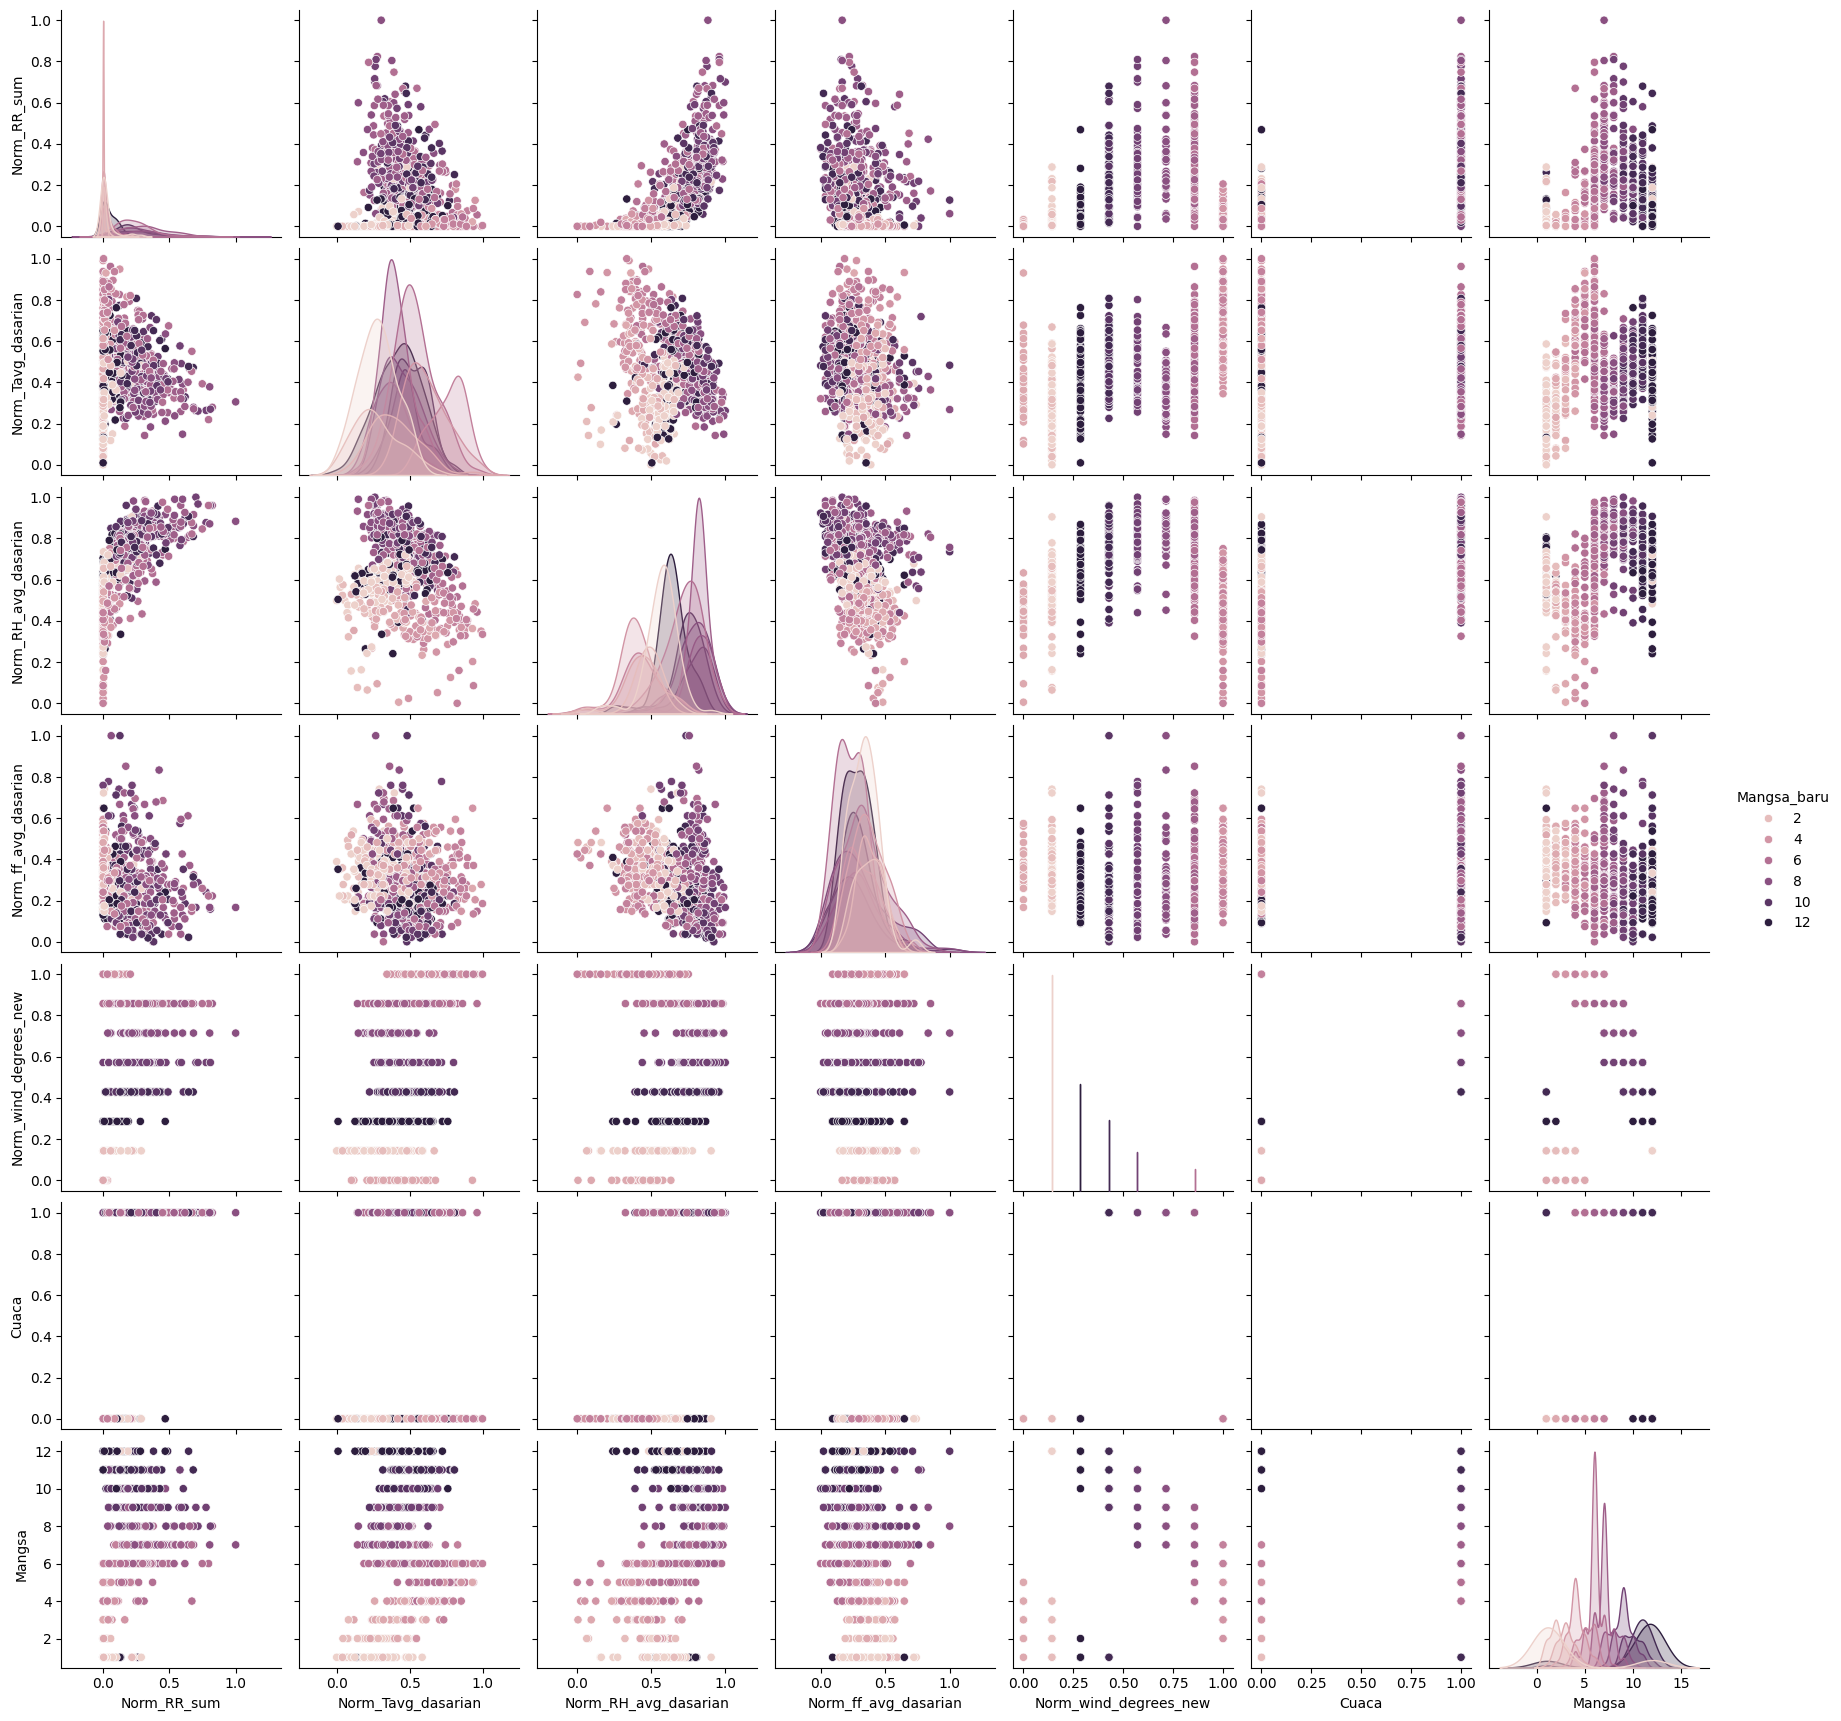

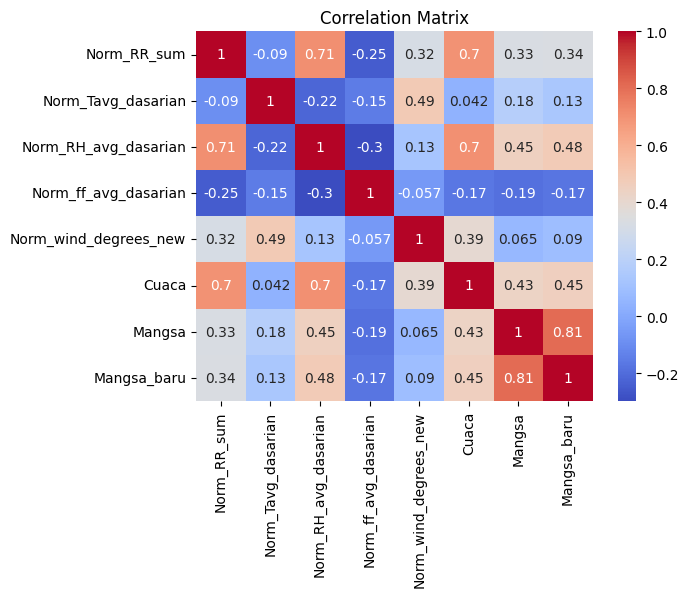

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming df_features and df_target are defined

# Combine features and target into a single DataFrame for EDA
df_combined = pd.concat([df_features, df_target], axis=1)

# Pairplot for Numerical Features
sns.pairplot(df_combined, hue='Mangsa_baru')
plt.show()

# Correlation Matrix
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

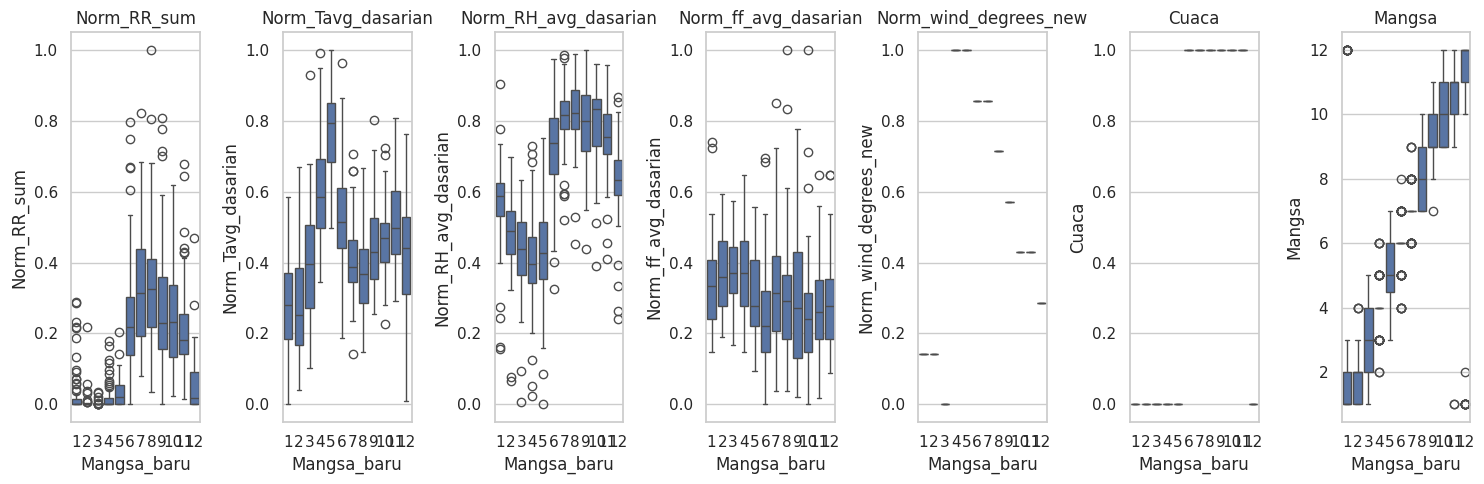

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a single row of boxplots for each feature
plt.figure(figsize=(15, 5))
for i, column in enumerate(df_combined.columns[:-1]):
    plt.subplot(1, len(df_combined.columns[:-1]), i+1)
    sns.boxplot(x='Mangsa_baru', y=column, data=df_combined)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

#split


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, train_size=0.75, test_size=0.25, random_state=42, stratify=df_target)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (567, 7) (567,)
Test set: (189, 7) (189,)


In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification

# # Assume you have X_train and y_train initialized before this point

# # Inisialisasi SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)

# # Terapkan SMOTE pada dataset
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Jumlah sampel sebelum dan sesudah SMOTE
# print("Jumlah sampel setelah SMOTE:", len(X_train))
# print("Jumlah sampel setelah SMOTE:", len(X_train_resampled))

#modelling


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=5,
    criterion='entropy'
)

# model_dtree.fit(X_train, y_train)
model_dtree.fit(X_train, y_train)
model_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [ ]:
# Menampilkan hyperparameter yang digunakan
hyperparameters = model_dtree.get_params()
print("Hyperparameters:")
print(hyperparameters)

Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
# Mendapatkan kedalaman pohon keputusan
depth_tree = model_dtree.tree_.max_depth
min_samples_leaf_used = model_dtree.min_samples_leaf
min_samples_split_used = model_dtree.min_samples_split

print("Kedalaman Pohon Keputusan:", depth_tree)
print("Nilai min_samples_leaf yang digunakan:", min_samples_leaf_used)
print("Nilai min_samples_split yang digunakan:", min_samples_split_used)

Kedalaman Pohon Keputusan: 5
Nilai min_samples_leaf yang digunakan: 1
Nilai min_samples_split yang digunakan: 5


In [ ]:
y_pred = model_dtree.predict(X_test)

print(y_pred[0:5])
print(y_test[0:5])

[ 9 11  1  4  1]
479     9
481    10
739     1
315     5
20      2
Name: Mangsa_baru, dtype: int64


In [ ]:
from sklearn.metrics import classification_report

# Assuming y is your true labels and y_pred is your predicted labels
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.89      0.81      0.85        21
           2       0.67      0.80      0.73        10
           3       1.00      1.00      1.00        10
           4       0.74      0.82      0.78        17
           5       0.70      0.58      0.64        12
           6       0.83      0.80      0.82        25
           7       0.77      0.81      0.79        21
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        16
          10       1.00      0.20      0.33        10
          11       0.65      1.00      0.79        15
          12       1.00      1.00      1.00        21

    accuracy                           0.84       189
   macro avg       0.85      0.82      0.81       189
weighted avg       0.85      0.84      0.83       189



In [ ]:
from sklearn.metrics import accuracy_score

print('Akurasi Decision Tree :', accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.8359788359788359


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Lakukan cross-validation dengan 5 fold
# cross_val_score secara otomatis membagi data menjadi 5 fold dan menghitung skor untuk setiap fold
scores = cross_val_score(model_dtree, df_features, df_target, cv=5, scoring=make_scorer(accuracy_score))

# Tampilkan skor untuk setiap fold
print("Cross-Validation Scores:", scores)

# Tampilkan rata-rata dan deviasi standar skor
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.82894737 0.81456954 0.8410596  0.79470199 0.8013245 ]
Average Score: 0.8161205995120252
Standard Deviation: 0.01712639547619207


In [ ]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Assuming best_model is your trained decision tree model and X_train is your training data
# plt.figure(figsize=(30, 10))
# plot_tree(
#     model_dtree,
#     filled=True,
#     feature_names=X_train.columns,
#     class_names=['Kemarau', 'Hujan'],
#     rounded=True,       # Rounded corners for better visualization
#     precision=3,        # Number of decimal places to round the threshold values
#     fontsize=10         # Adjust font size for better readability
# )
# plt.title("Decision Treel")
# plt.show()

#hyperparameter


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'random_state': [30, 40, 50],
    'criterion': ['entropy']
}

# Create the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_model

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
# Mendapatkan kedalaman pohon keputusan
depth_tree_bm = best_model.tree_.max_depth
print("Kedalaman Pohon Keputusan:", depth_tree_bm)

Kedalaman Pohon Keputusan: 5


In [ ]:
from sklearn.metrics import classification_report

# Assuming y is your true labels and y_pred is your predicted labels
report = classification_report(y_test, y_pred_best)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.59      0.71        17
           2       0.50      0.88      0.64         8
           3       1.00      1.00      1.00         8
           4       0.91      0.77      0.83        13
           5       0.75      0.90      0.82        10
           6       0.84      0.80      0.82        20
           7       0.78      0.82      0.80        17
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        13
          10       1.00      0.25      0.40         8
          11       0.67      1.00      0.80        12
          12       1.00      1.00      1.00        17

    accuracy                           0.84       152
   macro avg       0.86      0.83      0.82       152
weighted avg       0.87      0.84      0.83       152



In [ ]:
from sklearn.metrics import accuracy_score

print('Akurasi Decision Tree :', accuracy_score(y_test, y_pred_best))

Akurasi Decision Tree : 0.8355263157894737


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Lakukan cross-validation dengan 5 fold
# cross_val_score secara otomatis membagi data menjadi 5 fold dan menghitung skor untuk setiap fold
scores = cross_val_score(best_model, df_features, df_target, cv=5, scoring=make_scorer(accuracy_score))

# Tampilkan skor untuk setiap fold
print("Cross-Validation Scores:", scores)

# Tampilkan rata-rata dan deviasi standar skor
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.82894737 0.82119205 0.8410596  0.79470199 0.8013245 ]
Average Score: 0.8174451028232834
Standard Deviation: 0.017211097632066595


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Tentukan hyperparameter dan ruang pencarian
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['entropy']
}

# Inisialisasi model
dtree = DecisionTreeClassifier()

# Lakukan random search untuk mencari kombinasi hyperparameter terbaik
random_search = RandomizedSearchCV(dtree, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Dapatkan hasil hyperparameter terbaik
best_params_random = random_search.best_params_
print("Best Hyperparameters (Random Search):", best_params_random)

# Dapatkan model terbaik
best_model_rs = random_search.best_estimator_
y_pred_best_rs = best_model_rs.predict(X_test)
best_model_rs

Best Hyperparameters (Random Search): {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 7, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=7)

In [ ]:
from sklearn.metrics import classification_report

# Assuming y is your true labels and y_pred is your predicted labels
report = classification_report(y_test, y_pred_best_rs)
print(report)

              precision    recall  f1-score   support

           1       0.80      0.71      0.75        17
           2       0.50      0.62      0.56         8
           3       1.00      1.00      1.00         8
           4       0.90      0.69      0.78        13
           5       0.69      0.90      0.78        10
           6       0.79      0.75      0.77        20
           7       0.72      0.76      0.74        17
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        13
          10       0.54      0.88      0.67         8
          11       0.86      0.50      0.63        12
          12       1.00      1.00      1.00        17

    accuracy                           0.81       152
   macro avg       0.82      0.82      0.81       152
weighted avg       0.83      0.81      0.81       152



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Lakukan cross-validation dengan 5 fold
# cross_val_score secara otomatis membagi data menjadi 5 fold dan menghitung skor untuk setiap fold
scores = cross_val_score(best_model_rs, df_features, df_target, cv=5, scoring=make_scorer(accuracy_score))

# Tampilkan skor untuk setiap fold
print("Cross-Validation Scores:", scores)

# Tampilkan rata-rata dan deviasi standar skor
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.80263158 0.81456954 0.83443709 0.74172185 0.78145695]
Average Score: 0.794963401882189
Standard Deviation: 0.031681097609862104


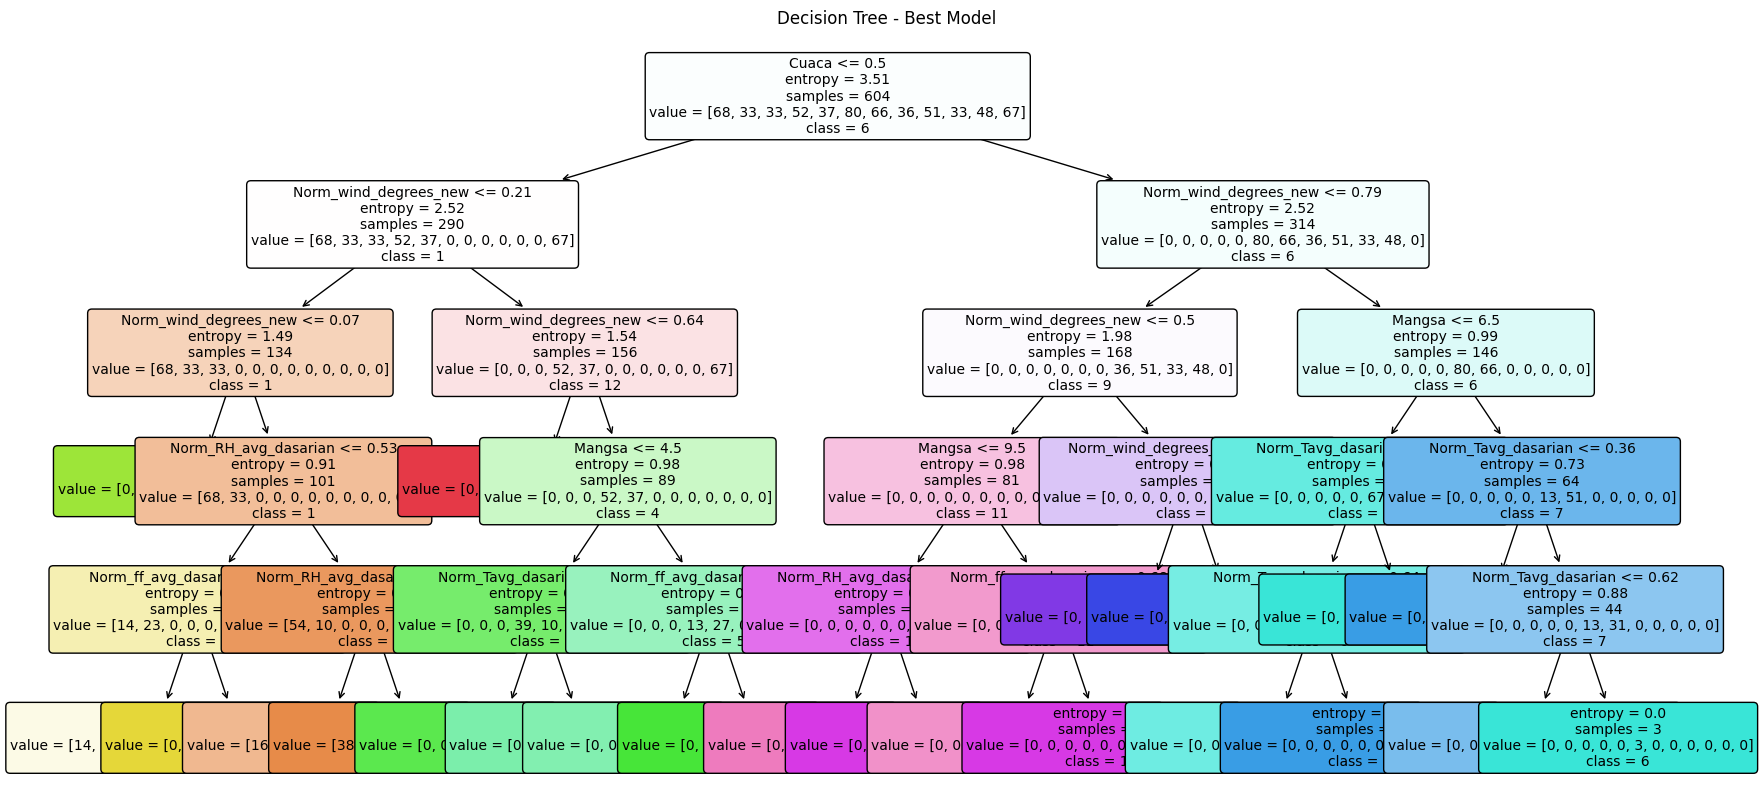

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming best_model is your trained decision tree model and X_train is your training data
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    filled=True,
    feature_names=X_train.columns,
    # class_names=['Kemarau', 'Hujan'],
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    rounded=True,       # Rounded corners for better visualization
    precision=2,        # Number of decimal places to round the threshold values
    fontsize=10         # Adjust font size for better readability
)
plt.title("Decision Tree - Best Model")
plt.show()


In [ ]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 10))
# plot_tree(best_model_rs, filled=True, feature_names=X_train.columns, class_names=['Kemarau', 'Hujan'])
# plt.title("Decision Tree - Best Model rs")
# plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred_best are your true labels and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred_best)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     cm,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     xticklabels=['Hujan (Actual)', 'Kemarau (Actual)'],
#     yticklabels=['Hujan (Predicted)', 'Kemarau (Predicted)'],
#     cbar=False,  # Remove color bar for clarity
#     annot_kws={"size": 16},  # Adjust annotation font size
# )
# plt.title('Confusion Matrix', fontsize=18)
# plt.xlabel('True Label', fontsize=14)
# plt.ylabel('Predicted Label', fontsize=14)
# plt.show()


In [ ]:
# Create a DataFrame with true labels and predictions
results_df = pd.DataFrame({'True_Labels': y_test, 'Predictions': y_pred_best})

# Group by 'True_Labels' and count occurrences
grouped_results = results_df.groupby('True_Labels').count()
grouped_results

,Predictions
True_Labels,
1,17
2,8
3,8
4,13
5,10
6,20
7,17
8,9
9,13


In [ ]:
# # Plot musim aktual
# plt.plot(df_new('Month_Year'), y_test, label='Musim Aktual', marker='o')

# # Plot musim prediksi
# plt.plot(df_new('Month_Year'), y_pred_best, label='Musim Prediksi', marker='x')

# # Tambahkan label dan judul
# plt.xlabel('Bulan')
# plt.ylabel('Suhu (Contoh)')
# plt.title('Perbandingan Musim Aktual dan Prediksi')

# # Tampilkan legenda
# plt.legend()

# # Tampilkan grafik
# plt.show()

#pre-processing new data


In [ ]:
df_pre = pd.read_csv("dataset_jogja2.csv")
df_pre

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,1/1/2022,24.0,30.8,27.3,78.0,0.0,0.0,6.0,180.0,1.0,C
1,1/2/2022,23.0,30.9,26.8,84.0,31.5,NaN,6.0,180.0,3.0,SW
2,1/3/2022,24.0,30.3,26.6,79.0,0.0,7.7,5.0,250.0,2.0,W
3,1/4/2022,21.4,31.2,26.6,76.0,0.0,5.5,5.0,250.0,2.0,SW
4,1/5/2022,22.8,32.2,27.5,75.0,0.0,9.6,4.0,250.0,2.0,W
...,...,...,...,...,...,...,...,...,...,...,...
694,11/26/2023,25.5,31.2,27.4,83.0,0.0,9.1,3.0,240.0,2.0,N
695,11/27/2023,24.6,30.5,27.3,82.0,0.0,10.2,5.0,260.0,2.0,SW
696,11/28/2023,24.2,30.1,27.0,84.0,0.0,10.0,4.0,240.0,1.0,SW
697,11/29/2023,25.1,30.6,27.0,85.0,0.4,8.9,6.0,170.0,3.0,SE


In [ ]:
# Define the filtering function
def filter_numeric(val):
    if val > 1000:
        val = np.NaN
    return val

# Apply the filtering function to all numeric columns in the DataFrame
numeric_columns = df_pre.select_dtypes(include='number').columns
df_pre[numeric_columns] = df_pre[numeric_columns].applymap(filter_numeric)

In [ ]:
import numpy as np

# Assuming 'ColumnName' is the name of the column where you want to replace 'c' with np.nan
df_pre['ddd_car'] = df_pre['ddd_car'].replace('C ', np.nan)

In [ ]:
# isi missing values ddd_car dengan modus
mode_value = df_pre['ddd_car'].mode()[0]
df_pre['ddd_car'].fillna(mode_value, inplace=True)
print('mode ddd_car', mode_value)

mode ddd_car SE


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  699 non-null    object 
 1   Tn       658 non-null    float64
 2   Tx       669 non-null    float64
 3   Tavg     673 non-null    float64
 4   RH_avg   673 non-null    float64
 5   RR       544 non-null    float64
 6   ss       677 non-null    float64
 7   ff_x     687 non-null    float64
 8   ddd_x    687 non-null    float64
 9   ff_avg   687 non-null    float64
 10  ddd_car  699 non-null    object 
dtypes: float64(9), object(2)
memory usage: 60.2+ KB


In [ ]:
# Get numerical columns to fill missing values
columns_to_fill = df_pre.select_dtypes(include='number').columns

# Check the number of missing values before filling
print("Missing values before filling:")
print(df_pre[columns_to_fill].isnull().sum())

# Iterate over numerical columns
for column in columns_to_fill:
    # Calculate the mean for the column
    mean_value = df_pre[column].mean()

    # Fill missing values with the calculated mean
    df_pre[column].fillna(mean_value, inplace=True)

# Check the number of missing values after filling
print("Missing values after filling:")
print(df_pre[columns_to_fill].isnull().sum())

Missing values before filling:
Tn         41
Tx         30
Tavg       26
RH_avg     26
RR        155
ss         22
ff_x       12
ddd_x      12
ff_avg     12
dtype: int64
Missing values after filling:
Tn        0
Tx        0
Tavg      0
RH_avg    0
RR        0
ss        0
ff_x      0
ddd_x     0
ff_avg    0
dtype: int64


In [ ]:
# Convert 'Tanggal' column to datetime format
df_pre['Tanggal'] = pd.to_datetime(df_pre['Tanggal'], format='%m/%d/%Y')
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  699 non-null    datetime64[ns]
 1   Tn       699 non-null    float64       
 2   Tx       699 non-null    float64       
 3   Tavg     699 non-null    float64       
 4   RH_avg   699 non-null    float64       
 5   RR       699 non-null    float64       
 6   ss       699 non-null    float64       
 7   ff_x     699 non-null    float64       
 8   ddd_x    699 non-null    float64       
 9   ff_avg   699 non-null    float64       
 10  ddd_car  699 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 60.2+ KB


In [ ]:
# Buat kolom 'Mangsa' dengan nilai default 7
df_pre['Mangsa'] = 7

# Set nilai 'Kasa' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 6) & (df_pre['Tanggal'].dt.day >= 22) |
       (df_pre['Tanggal'].dt.month == 7) |
       (df_pre['Tanggal'].dt.month == 8) & (df_pre['Tanggal'].dt.day <= 1), 'Mangsa'] = 1

# Set nilai 'Karo' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 8) & (df_pre['Tanggal'].dt.day >= 2) & (df_pre['Tanggal'].dt.day <= 24), 'Mangsa'] = 2

# Set nilai 'Katelu' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 8) & (df_pre['Tanggal'].dt.day >= 25) |
       (df_pre['Tanggal'].dt.month == 9) & (df_pre['Tanggal'].dt.day <= 17), 'Mangsa'] = 3

# Set nilai 'Kapat' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 9) & (df_pre['Tanggal'].dt.day >= 18) |
       (df_pre['Tanggal'].dt.month == 10) & (df_pre['Tanggal'].dt.day <= 12), 'Mangsa'] = 4

# Set nilai 'Kalimo' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 10) & (df_pre['Tanggal'].dt.day >= 13) |
       (df_pre['Tanggal'].dt.month == 11) & (df_pre['Tanggal'].dt.day <= 8), 'Mangsa'] = 5

# Set nilai 'Kanem' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 11) & (df_pre['Tanggal'].dt.day >= 9) |
       (df_pre['Tanggal'].dt.month == 12) & (df_pre['Tanggal'].dt.day <= 21), 'Mangsa'] = 6

# Set nilai 'Kawolu' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 2) & (df_pre['Tanggal'].dt.day >= 3) & (df_pre['Tanggal'].dt.day <= 29), 'Mangsa'] = 8

# Set nilai 'Kasanga' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 3) & (df_pre['Tanggal'].dt.day >= 1) |
       (df_pre['Tanggal'].dt.month == 3) & (df_pre['Tanggal'].dt.day <= 25), 'Mangsa'] = 9

# Set nilai 'Kasadasa' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 3) & (df_pre['Tanggal'].dt.day >= 26) |
       (df_pre['Tanggal'].dt.month == 4) & (df_pre['Tanggal'].dt.day <= 18), 'Mangsa'] = 10

# Set nilai 'Dhesta' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 4) & (df_pre['Tanggal'].dt.day >= 19) |
       (df_pre['Tanggal'].dt.month == 5) & (df_pre['Tanggal'].dt.day <= 11), 'Mangsa'] = 11

# Set nilai 'Sadha' untuk rentang tanggal tertentu
df_pre.loc[(df_pre['Tanggal'].dt.month == 5) & (df_pre['Tanggal'].dt.day >= 12) |
       (df_pre['Tanggal'].dt.month == 6) & (df_pre['Tanggal'].dt.day <= 21), 'Mangsa'] = 12

In [ ]:
df_pre

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Mangsa
0,2022-01-01,24.0,30.8,27.3,78.0,0.0,0.000000,6.0,180.0,1.0,SE,7
1,2022-01-02,23.0,30.9,26.8,84.0,31.5,8.076662,6.0,180.0,3.0,SW,7
2,2022-01-03,24.0,30.3,26.6,79.0,0.0,7.700000,5.0,250.0,2.0,W,7
3,2022-01-04,21.4,31.2,26.6,76.0,0.0,5.500000,5.0,250.0,2.0,SW,7
4,2022-01-05,22.8,32.2,27.5,75.0,0.0,9.600000,4.0,250.0,2.0,W,7
...,...,...,...,...,...,...,...,...,...,...,...,...
694,2023-11-26,25.5,31.2,27.4,83.0,0.0,9.100000,3.0,240.0,2.0,N,6
695,2023-11-27,24.6,30.5,27.3,82.0,0.0,10.200000,5.0,260.0,2.0,SW,6
696,2023-11-28,24.2,30.1,27.0,84.0,0.0,10.000000,4.0,240.0,1.0,SW,6
697,2023-11-29,25.1,30.6,27.0,85.0,0.4,8.900000,6.0,170.0,3.0,SE,6


In [ ]:
df_pre['Dasarian'] = 1
df_pre.loc[(df_pre['Tanggal'].dt.day > 10) & (df_pre['Tanggal'].dt.day <= 20), 'Dasarian'] = 2
df_pre.loc[(df_pre['Tanggal'].dt.day > 20), 'Dasarian'] = 3
df_pre.tail(20)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Mangsa,Dasarian
679,2023-11-11,25.6,30.5,27.5,82.0,0.000000,5.9,4.0,120.0,2.0,SE,6,2
680,2023-11-12,25.4,29.6,26.9,84.0,0.400000,8.0,5.0,140.0,2.0,SE,6,2
681,2023-11-13,24.4,30.4,27.7,84.0,0.000000,8.8,7.0,170.0,4.0,SE,6,2
682,2023-11-14,25.9,29.4,27.1,87.0,0.000000,7.8,8.0,140.0,4.0,SE,6,2
683,2023-11-15,25.2,29.8,27.2,87.0,2.600000,8.7,6.0,140.0,3.0,S,6,2
684,2023-11-16,25.0,30.5,26.6,86.0,8.769853,9.4,6.0,180.0,2.0,SE,6,2
685,2023-11-17,23.9,30.7,27.1,84.0,0.000000,9.7,6.0,170.0,3.0,S,6,2
686,2023-11-18,23.2,31.0,27.8,80.0,0.000000,10.9,5.0,210.0,3.0,S,6,2
687,2023-11-19,25.0,30.6,27.6,80.0,0.000000,9.8,6.0,200.0,3.0,S,6,2
688,2023-11-20,25.0,29.2,27.1,87.0,0.000000,8.5,6.0,250.0,3.0,SW,6,2


In [ ]:
# Extract month-year information
df_pre['Month_Year'] = df_pre['Tanggal'].dt.to_period('M')

# Group by 'Dasarian' and 'Month_Year', then calculate the sum for the 'RR' column
dasarian_monthly_sum = df_pre.groupby(['Dasarian', 'Month_Year'])['RR'].sum().reset_index()

# Merge the calculated sum back to the original DataFrame
df_pre = pd.merge(df_pre, dasarian_monthly_sum, on=['Dasarian', 'Month_Year'], how='left', suffixes=('', '_sum'))

In [ ]:
# Calculate the average for each 'Dasarian' within each month
average_dasarian = df_pre.groupby(['Month_Year', 'Dasarian'])[['Tavg', 'RH_avg', 'ff_avg', 'ss']].mean().reset_index()

# Merge the averages back into the original DataFrame
df_pre = pd.merge(df_pre, average_dasarian, on=['Month_Year', 'Dasarian'], how='left', suffixes=('', '_dasarian'))

df_pre

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Mangsa,Dasarian,Month_Year,RR_sum,Tavg_dasarian,RH_avg_dasarian,ff_avg_dasarian,ss_dasarian
0,2022-01-01,24.0,30.8,27.3,78.0,0.0,0.000000,6.0,180.0,1.0,SE,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666
1,2022-01-02,23.0,30.9,26.8,84.0,31.5,8.076662,6.0,180.0,3.0,SW,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666
2,2022-01-03,24.0,30.3,26.6,79.0,0.0,7.700000,5.0,250.0,2.0,W,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666
3,2022-01-04,21.4,31.2,26.6,76.0,0.0,5.500000,5.0,250.0,2.0,SW,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666
4,2022-01-05,22.8,32.2,27.5,75.0,0.0,9.600000,4.0,250.0,2.0,W,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2023-11-26,25.5,31.2,27.4,83.0,0.0,9.100000,3.0,240.0,2.0,N,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000
695,2023-11-27,24.6,30.5,27.3,82.0,0.0,10.200000,5.0,260.0,2.0,SW,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000
696,2023-11-28,24.2,30.1,27.0,84.0,0.0,10.000000,4.0,240.0,1.0,SW,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000
697,2023-11-29,25.1,30.6,27.0,85.0,0.4,8.900000,6.0,170.0,3.0,SE,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000


In [ ]:
# Group by 'Month_Year' dan 'Dasarian', dan ambil nilai 'ddd_car' yang paling sering muncul
df_most_frequent_ddd_car = df_pre.groupby(['Month_Year', 'Dasarian'])['ddd_car'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Merge DataFrame asli dengan DataFrame hasil grouping untuk menambahkan kolom baru
df_pre = pd.merge(df_pre, df_most_frequent_ddd_car, on=['Month_Year', 'Dasarian'], how='left', suffixes=('', '_most'))

df_pre

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Mangsa,Dasarian,Month_Year,RR_sum,Tavg_dasarian,RH_avg_dasarian,ff_avg_dasarian,ss_dasarian,ddd_car_most
0,2022-01-01,24.0,30.8,27.3,78.0,0.0,0.000000,6.0,180.0,1.0,SE,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666,W
1,2022-01-02,23.0,30.9,26.8,84.0,31.5,8.076662,6.0,180.0,3.0,SW,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666,W
2,2022-01-03,24.0,30.3,26.6,79.0,0.0,7.700000,5.0,250.0,2.0,W,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666,W
3,2022-01-04,21.4,31.2,26.6,76.0,0.0,5.500000,5.0,250.0,2.0,SW,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666,W
4,2022-01-05,22.8,32.2,27.5,75.0,0.0,9.600000,4.0,250.0,2.0,W,7,1,2022-01,58.000000,26.90,79.5,1.7,6.617666,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2023-11-26,25.5,31.2,27.4,83.0,0.0,9.100000,3.0,240.0,2.0,N,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000,S
695,2023-11-27,24.6,30.5,27.3,82.0,0.0,10.200000,5.0,260.0,2.0,SW,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000,S
696,2023-11-28,24.2,30.1,27.0,84.0,0.0,10.000000,4.0,240.0,1.0,SW,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000,S
697,2023-11-29,25.1,30.6,27.0,85.0,0.4,8.900000,6.0,170.0,3.0,SE,6,3,2023-11,13.769853,27.37,85.5,2.3,9.270000,S


In [ ]:
df_newpre = df_pre[['Month_Year', 'Mangsa', 'Dasarian', 'RR_sum', 'Tavg_dasarian', 'RH_avg_dasarian', 'ss_dasarian', 'ff_avg_dasarian', 'ddd_car_most']]
df_newpre

,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most
0,2022-01,7,1,58.000000,26.90,79.5,6.617666,1.7,W
1,2022-01,7,1,58.000000,26.90,79.5,6.617666,1.7,W
2,2022-01,7,1,58.000000,26.90,79.5,6.617666,1.7,W
3,2022-01,7,1,58.000000,26.90,79.5,6.617666,1.7,W
4,2022-01,7,1,58.000000,26.90,79.5,6.617666,1.7,W
...,...,...,...,...,...,...,...,...,...
694,2023-11,6,3,13.769853,27.37,85.5,9.270000,2.3,S
695,2023-11,6,3,13.769853,27.37,85.5,9.270000,2.3,S
696,2023-11,6,3,13.769853,27.37,85.5,9.270000,2.3,S
697,2023-11,6,3,13.769853,27.37,85.5,9.270000,2.3,S


In [ ]:
# Hapus baris yang memiliki nilai 'Month_Year' dan 'Dasarian' yang sama
df_newpre = df_newpre.drop_duplicates(subset=['Month_Year', 'Dasarian'])
df_newpre

,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE
...,...,...,...,...,...,...,...,...,...
648,2023-10,4,2,17.539706,25.370000,88.000000,8.350000,2.300000,S
658,2023-10,5,3,35.079412,26.941834,84.108740,9.643333,2.086542,S
669,2023-11,5,1,26.309559,27.510000,83.500000,8.860000,2.800000,S
679,2023-11,6,2,11.769853,27.260000,84.100000,8.750000,2.900000,SE


In [ ]:
# Function to convert wind direction string to degrees
def convert_to_degrees(direction):
    direction_mapping = {
        "N ": 0,
        "NE": 45,
        "E ": 90,
        "SE": 135,
        "S ": 180,
        "SW": 225,
        "W ": 270,
        "NW": 315
    }

    # Convert the direction to degrees, defaulting to 0 if not found in the mapping
    degrees = direction_mapping.get(direction, 0)
    return degrees

# Apply the conversion function to the 'ddd_car_most' column using .loc
df_newpre.loc[:, 'wind_degrees'] = df_newpre['ddd_car_most'].apply(convert_to_degrees)

<ipython-input-50-c96e6fc8675a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre.loc[:, 'wind_degrees'] = df_newpre['ddd_car_most'].apply(convert_to_degrees)


#giving class new pre for check the accuracy


In [ ]:
# Check if any dasarian in each month has a cumulative sum of 50 or more
df_newpre.loc[:, 'Potensi_Hujan'] = df_newpre.groupby(['Dasarian', 'Month_Year'])['RR_sum'].transform(lambda x: any(x >= 50))

df_newpre

<ipython-input-51-0f84ad5f45f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre.loc[:, 'Potensi_Hujan'] = df_newpre.groupby(['Dasarian', 'Month_Year'])['RR_sum'].transform(lambda x: any(x >= 50))


,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W,270,True
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE,135,True
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W,270,True
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE,135,True
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE,135,True
...,...,...,...,...,...,...,...,...,...,...,...
648,2023-10,4,2,17.539706,25.370000,88.000000,8.350000,2.300000,S,180,False
658,2023-10,5,3,35.079412,26.941834,84.108740,9.643333,2.086542,S,180,False
669,2023-11,5,1,26.309559,27.510000,83.500000,8.860000,2.800000,S,180,False
679,2023-11,6,2,11.769853,27.260000,84.100000,8.750000,2.900000,SE,135,False


In [ ]:
# Check if 'Potensi_Hujan' is true three times consecutively
df_newpre['Potensi_Hujan_Turut_3'] = df_newpre['Potensi_Hujan'].rolling(window=3).sum() == 3

# Set 'Musim' to 'Hujan' where the condition is met
df_newpre.loc[df_newpre['Potensi_Hujan_Turut_3'], 'Musim'] = 'Hujan'

# Drop the temporary column if not needed
df_newpre.drop(['Potensi_Hujan_Turut_3'], axis=1, inplace=True)

<ipython-input-52-1d3ad3b3459a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre['Potensi_Hujan_Turut_3'] = df_newpre['Potensi_Hujan'].rolling(window=3).sum() == 3
<ipython-input-52-1d3ad3b3459a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre.loc[df_newpre['Potensi_Hujan_Turut_3'], 'Musim'] = 'Hujan'
<ipython-input-52-1d3ad3b3459a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
# Check if 'Potensi_Hujan' is false three times consecutively
df_newpre['Potensi_Kemarau_Turut_3'] = (~df_newpre['Potensi_Hujan']).rolling(window=3).sum() == 3

# Set 'Musim' to 'Kemarau' where the condition is met
df_newpre.loc[df_newpre['Potensi_Kemarau_Turut_3'], 'Musim'] = 'Kemarau'

# Drop the temporary column if not needed
df_newpre.drop(['Potensi_Kemarau_Turut_3'], axis=1, inplace=True)

<ipython-input-53-8e00a4b3b949>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre['Potensi_Kemarau_Turut_3'] = (~df_newpre['Potensi_Hujan']).rolling(window=3).sum() == 3
<ipython-input-53-8e00a4b3b949>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre.drop(['Potensi_Kemarau_Turut_3'], axis=1, inplace=True)


In [ ]:
# Assuming NaN represents missing values
df_newpre['Musim'].fillna(method='bfill', inplace=True)

<ipython-input-54-e114a9d53ec6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre['Musim'].fillna(method='bfill', inplace=True)


In [ ]:
# Assuming NaN represents missing values
df_newpre['Musim'].fillna(method='ffill', inplace=True)

<ipython-input-55-9766d6a5eca4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre['Musim'].fillna(method='ffill', inplace=True)


In [ ]:
df_newpre

,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W,270,True,Hujan
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE,135,True,Hujan
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W,270,True,Hujan
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE,135,True,Hujan
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE,135,True,Hujan
...,...,...,...,...,...,...,...,...,...,...,...,...
648,2023-10,4,2,17.539706,25.370000,88.000000,8.350000,2.300000,S,180,False,Kemarau
658,2023-10,5,3,35.079412,26.941834,84.108740,9.643333,2.086542,S,180,False,Kemarau
669,2023-11,5,1,26.309559,27.510000,83.500000,8.860000,2.800000,S,180,False,Kemarau
679,2023-11,6,2,11.769853,27.260000,84.100000,8.750000,2.900000,SE,135,False,Kemarau


In [ ]:
# Identifikasi kolom-kolom yang perlu dinormalisasi
# kolom_normalisasi = ['RR_sum', 'wind_degrees']
kolom_normalisasi = ['RR_sum', 'Tavg_dasarian', 'RH_avg_dasarian', 'ff_avg_dasarian', 'wind_degrees']

# Normalisasi Min-Max hanya pada kolom-kolom yang perlu dinormalisasi
for kolom in kolom_normalisasi:
    min_val = min(df_newpre[kolom])
    max_val = max(df_newpre[kolom])
    df_newpre[f'Norm_{kolom}'] = [(x - min_val) / (max_val - min_val) for x in df_newpre[kolom]]

df_newpre.head(20)

<ipython-input-58-38385d3c904e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre[f'Norm_{kolom}'] = [(x - min_val) / (max_val - min_val) for x in df_newpre[kolom]]
<ipython-input-58-38385d3c904e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre[f'Norm_{kolom}'] = [(x - min_val) / (max_val - min_val) for x in df_newpre[kolom]]


,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Norm_RR_sum,Norm_Tavg_dasarian,Norm_RH_avg_dasarian,Norm_ff_avg_dasarian,Norm_wind_degrees
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W,270,True,Hujan,0.132239,0.816316,0.089796,0.171429,0.857143
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE,135,True,Hujan,0.255130,0.634636,0.466939,0.171429,0.428571
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W,270,True,Hujan,0.192886,0.798216,0.330612,0.361039,0.857143
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE,135,True,Hujan,0.285226,0.731698,0.413061,0.171429,0.428571
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE,135,True,Hujan,0.627701,0.577394,0.718367,0.114286,0.428571
51,2022-02,8,3,31.069853,26.687500,78.500000,2.762500,2.375000,W,270,False,Hujan,0.070839,0.763429,0.000000,0.364286,0.857143
59,2022-03,9,1,72.900000,26.170000,85.000000,2.470000,2.600000,W,270,True,Hujan,0.166211,0.634636,0.583673,0.428571,0.857143
69,2022-03,9,2,109.300000,26.230000,86.600000,3.610000,1.800000,SE,135,True,Hujan,0.249202,0.649568,0.727347,0.200000,0.428571
79,2022-03,9,3,135.339706,26.363636,84.181818,3.345455,1.636364,W,270,True,Hujan,0.308572,0.682827,0.510204,0.153247,0.857143
90,2022-04,10,1,146.900000,26.020000,85.300000,6.540000,1.800000,SE,135,True,Hujan,0.334929,0.597304,0.610612,0.200000,0.428571


In [ ]:
# Membuat peta (mapping)
mapping = {'Hujan': 1, 'Kemarau': 0}

# Fungsi untuk mengubah kata menjadi integer
def convert_to_integer(word):
    return mapping.get(word, -1)  # Mengembalikan -1 jika kata tidak ditemukan

# Membuat kolom baru dengan integer
df_newpre['Cuaca'] = df_newpre['Musim'].apply(convert_to_integer)

df_newpre

<ipython-input-64-3b9f394d7fb3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre['Cuaca'] = df_newpre['Musim'].apply(convert_to_integer)


,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Norm_RR_sum,Norm_Tavg_dasarian,Norm_RH_avg_dasarian,Norm_ff_avg_dasarian,Norm_wind_degrees,Cuaca
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W,270,True,Hujan,0.132239,0.816316,0.089796,0.171429,0.857143,1
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE,135,True,Hujan,0.255130,0.634636,0.466939,0.171429,0.428571,1
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W,270,True,Hujan,0.192886,0.798216,0.330612,0.361039,0.857143,1
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE,135,True,Hujan,0.285226,0.731698,0.413061,0.171429,0.428571,1
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE,135,True,Hujan,0.627701,0.577394,0.718367,0.114286,0.428571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2023-10,4,2,17.539706,25.370000,88.000000,8.350000,2.300000,S,180,False,Kemarau,0.039990,0.435534,0.853061,0.342857,0.571429,0
658,2023-10,5,3,35.079412,26.941834,84.108740,9.643333,2.086542,S,180,False,Kemarau,0.079980,0.826727,0.503642,0.281869,0.571429,0
669,2023-11,5,1,26.309559,27.510000,83.500000,8.860000,2.800000,S,180,False,Kemarau,0.059985,0.968130,0.448980,0.485714,0.571429,0
679,2023-11,6,2,11.769853,27.260000,84.100000,8.750000,2.900000,SE,135,False,Kemarau,0.026835,0.905911,0.502857,0.514286,0.428571,0


In [ ]:
# df_features = df_newpre[['Norm_RR_sum', 'Norm_Tavg_dasarian', 'Norm_RH_avg_dasarian', 'Norm_ff_avg_dasarian', 'Norm_wind_degrees', 'Cuaca', 'Mangsa']]
# df_target = df_newpre['Mangsa_baru']

KeyError: "['Cuaca'] not in index"

#predict new data


In [ ]:
# Ubah nama kolom 'Norm_wind_degrees' menjadi 'Norm_wind_degrees_new'
df_newpre.rename(columns={'Norm_wind_degrees': 'Norm_wind_degrees_new'}, inplace=True)

df_newpre

<ipython-input-66-abf286aa4de8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre.rename(columns={'Norm_wind_degrees': 'Norm_wind_degrees_new'}, inplace=True)


,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Norm_RR_sum,Norm_Tavg_dasarian,Norm_RH_avg_dasarian,Norm_ff_avg_dasarian,Norm_wind_degrees_new,Cuaca
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W,270,True,Hujan,0.132239,0.816316,0.089796,0.171429,0.857143,1
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE,135,True,Hujan,0.255130,0.634636,0.466939,0.171429,0.428571,1
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W,270,True,Hujan,0.192886,0.798216,0.330612,0.361039,0.857143,1
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE,135,True,Hujan,0.285226,0.731698,0.413061,0.171429,0.428571,1
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE,135,True,Hujan,0.627701,0.577394,0.718367,0.114286,0.428571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2023-10,4,2,17.539706,25.370000,88.000000,8.350000,2.300000,S,180,False,Kemarau,0.039990,0.435534,0.853061,0.342857,0.571429,0
658,2023-10,5,3,35.079412,26.941834,84.108740,9.643333,2.086542,S,180,False,Kemarau,0.079980,0.826727,0.503642,0.281869,0.571429,0
669,2023-11,5,1,26.309559,27.510000,83.500000,8.860000,2.800000,S,180,False,Kemarau,0.059985,0.968130,0.448980,0.485714,0.571429,0
679,2023-11,6,2,11.769853,27.260000,84.100000,8.750000,2.900000,SE,135,False,Kemarau,0.026835,0.905911,0.502857,0.514286,0.428571,0


In [ ]:
# Assuming new_data is your new DataFrame with features 'RR', 'Tavg', 'RH_avg', 'ff_avg', 'wind_degrees'
# Make sure that the features in new_data are consistent with the features used during training

# Select only the relevant columns from new_data
new_data_features = df_newpre[['Norm_RR_sum', 'Norm_Tavg_dasarian', 'Norm_RH_avg_dasarian', 'Norm_ff_avg_dasarian', 'Norm_wind_degrees_new', 'Cuaca', 'Mangsa']]

# Use the trained model to make predictions on new data
# new_pred = best_model.predict(new_data_features)
new_pred = model_dtree.predict(new_data_features)

new_pred

array([ 6, 11,  6, 11, 11,  6,  6, 11,  6, 11, 11, 11, 11,  9, 11, 11, 12,
       12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10,  9,  6, 10, 10, 10, 11,
       11,  7, 11, 11, 11, 11, 11,  4,  3,  3, 12,  3,  3, 12, 12, 12, 12,
       12, 12,  9, 11, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12])

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'Musim' is the true label in new_data
true_labels = df_newpre['Mangsa']

# Use the classification_report
report = classification_report(true_labels, new_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         4
          11       0.08      0.33      0.12         6
          12       0.22      0.62      0.32         8

    accuracy                           0.10        69
   macro avg       0.02      0.08      0.04        69
weighted avg       0.03      0.10      0.05        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

print('Akurasi Decision Tree :', accuracy_score(true_labels, new_pred))

Akurasi Decision Tree : 0.10144927536231885


In [ ]:
# Assuming 'Musim' is the true label in new_data
df_newpre['Mangsa_Predict'] = new_pred
df_newpre

<ipython-input-78-3a4867903dce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newpre['Mangsa_Predict'] = new_pred


,Month_Year,Mangsa,Dasarian,RR_sum,Tavg_dasarian,RH_avg_dasarian,ss_dasarian,ff_avg_dasarian,ddd_car_most,wind_degrees,Potensi_Hujan,Musim,Norm_RR_sum,Norm_Tavg_dasarian,Norm_RH_avg_dasarian,Norm_ff_avg_dasarian,Norm_wind_degrees_new,Cuaca,Musim_Predict,Mangsa_Predict
0,2022-01,7,1,58.000000,26.900000,79.500000,6.617666,1.700000,W,270,True,Hujan,0.132239,0.816316,0.089796,0.171429,0.857143,1,6,6
10,2022-01,7,2,111.900000,26.170000,83.700000,4.220000,1.700000,SE,135,True,Hujan,0.255130,0.634636,0.466939,0.171429,0.428571,1,11,11
20,2022-01,7,3,84.600000,26.827273,82.181818,5.700000,2.363636,W,270,True,Hujan,0.192886,0.798216,0.330612,0.361039,0.857143,1,6,6
31,2022-02,7,1,125.100000,26.560000,83.100000,3.870000,1.700000,SE,135,True,Hujan,0.285226,0.731698,0.413061,0.171429,0.428571,1,11,11
41,2022-02,8,2,275.309559,25.940000,86.500000,3.090000,1.500000,SE,135,True,Hujan,0.627701,0.577394,0.718367,0.114286,0.428571,1,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2023-10,4,2,17.539706,25.370000,88.000000,8.350000,2.300000,S,180,False,Kemarau,0.039990,0.435534,0.853061,0.342857,0.571429,0,12,12
658,2023-10,5,3,35.079412,26.941834,84.108740,9.643333,2.086542,S,180,False,Kemarau,0.079980,0.826727,0.503642,0.281869,0.571429,0,12,12
669,2023-11,5,1,26.309559,27.510000,83.500000,8.860000,2.800000,S,180,False,Kemarau,0.059985,0.968130,0.448980,0.485714,0.571429,0,12,12
679,2023-11,6,2,11.769853,27.260000,84.100000,8.750000,2.900000,SE,135,False,Kemarau,0.026835,0.905911,0.502857,0.514286,0.428571,0,12,12


In [ ]:
# Assuming df is your DataFrame
df_newpre.to_csv('datanewpredict.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming true_labels and new_pred are your true labels and predicted labels
cm = confusion_matrix(true_labels, new_pred)

# Define the class labels
class_labels = ['Hujan', 'Kemarau']

# Plot the confusion matrix heatmap with clearer font
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
    annot_kws={"size": 16, "weight": "bold"},  # Adjust annotation font size and weight
    cbar=False,  # Remove color bar for clarity
)
plt.title('Confusion Matrix - Actual vs Predicted Musim', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()


#model CART


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(criterion='gini')

# Fit model pada data training
model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred_cart = model.predict(X_test)

# Evaluasi performa model
print("Accuracy Score:", accuracy_score(y_test, y_pred_cart))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cart))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cart))


Accuracy Score: 0.9118942731277533

Confusion Matrix:
[[104   7]
 [ 13 103]]

Classification Report:
              precision    recall  f1-score   support

       Hujan       0.89      0.94      0.91       111
     Kemarau       0.94      0.89      0.91       116

    accuracy                           0.91       227
   macro avg       0.91      0.91      0.91       227
weighted avg       0.91      0.91      0.91       227



In [ ]:
print('Akurasi Decision Tree :', accuracy_score(y_test, y_pred_cart))

Akurasi Decision Tree : 0.9118942731277533


In [ ]:
model

DecisionTreeClassifier()

#ID3


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model Decision Tree dengan algoritma ID3
model_id3 = DecisionTreeClassifier()

# Fit model pada data training
model_id3.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred_id3 = model_id3.predict(X_test)

# Evaluasi performa model ID3
print("Accuracy Score (ID3):", accuracy_score(y_test, y_pred_id3))
print("\nConfusion Matrix (ID3):")
print(confusion_matrix(y_test, y_pred_id3))
print("\nClassification Report (ID3):")
print(classification_report(y_test, y_pred_id3))


Accuracy Score (ID3): 0.920704845814978

Confusion Matrix (ID3):
[[104   7]
 [ 11 105]]

Classification Report (ID3):
              precision    recall  f1-score   support

       Hujan       0.90      0.94      0.92       111
     Kemarau       0.94      0.91      0.92       116

    accuracy                           0.92       227
   macro avg       0.92      0.92      0.92       227
weighted avg       0.92      0.92      0.92       227



In [ ]:
from sklearn.metrics import accuracy_score

print('Akurasi Decision Tree :', accuracy_score(y_test, y_pred_id3))

Akurasi Decision Tree : 0.920704845814978


In [ ]:
model_id3

DecisionTreeClassifier()

#another modelling


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(df_new[features], df_new[target], train_size=0.7, test_size=0.3, shuffle=False)

# Print samples after running train_test_split
print("X_train: {}, Y_train: {}".format(len(x_train), len(x_test)))
print("X_train: {}, Y_train: {}".format(len(y_train), len(y_test)))

print("\n")

# Decision Tree Classifier Model setup after parameter tuning
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,

            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model.fit(x_train, y_train)

# Print results to evaluate model
print("Showing Performance Metrics for Decision Tree Classifier\n")

print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

print("\n")

print("Confusion Matrix for Decision Tree Classifier\n")
labels = [0, 1, 2]
cm = confusion_matrix(y_test, predicted, labels=labels)
print(cm)

print("\n")

print('Precision, Recall and f-1 Scores for Decision Tree Classifier\n')
print(classification_report(y_test, predicted))